# Prefacio

Este libro está dirigido a científicos de datos familiarizados de algún modo con los lenguajes de
programación R y/o Python, y con una formación básica (quizás irregular o efímera) a la
estadística. Dos de los autores de este libro llegamos al mundo de la ciencia de datos desde el
mundo de la estadística y apreciamos en cierta medida la contribución que la estadística puede
hacer al arte de la ciencia de datos. Al mismo tiempo, somos muy conscientes de las limitaciones
de la enseñanza de la estadística tradicional: la estadística como disciplina tiene un siglo y medio
de vida, y la mayoría de los libros de texto y cursos de estadística están cargados con el impulso y
la inercia de un transatlántico. Todos los métodos de este libro tienen alguna conexión, histórica o
metodológica, con la disciplina de la estadística. No se incluyen los métodos que evolucionaron
principalmente a partir de la informática, como es el caso de las redes neuronales.
El libro tiene dos objetivos:
Presentar, en forma digerible, navegable y de fácil referencia, conceptos clave de estadística
que son relevantes para la ciencia de datos.
Explicar qué conceptos son importantes y útiles desde la perspectiva de la ciencia de datos,
cuáles lo son menos y por qué.

## Importaciones de la unidad

In [22]:
from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [23]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

1. `try:`: El bloque `try` se utiliza para encerrar el código que podría generar una excepción.
   
2. `import common`: Intenta importar el módulo llamado `common`. Este módulo probablemente contiene alguna función o datos que se necesitan en el programa.

3. `DATA = common.dataDirectory()`: Si la importación de `common` es exitosa, se llama a la función `dataDirectory()` del módulo `common` y se asigna el resultado a la variable `DATA`. La función `dataDirectory()` podría estar proporcionando un directorio de datos específico.

4. `except ImportError:`: Si hay un error al importar el módulo `common` y la excepción generada es de tipo `ImportError`, el bloque `except` se ejecutará.

5. `DATA = Path().resolve() / 'data'`: En el bloque `except`, se asigna a `DATA` la ruta completa al directorio 'data' en el directorio actual. Se utiliza `Path().resolve()` para obtener la ruta completa al directorio actual y luego se añade '/data' para construir la ruta al directorio de datos.

En resumen, este código intenta importar el módulo `common` para obtener datos de un directorio específico. Si la importación falla (debido a un `ImportError`), se establece manualmente el directorio de datos a uno dentro del directorio actual. Esto proporciona flexibilidad en la obtención de datos, permitiendo que el programa funcione incluso si el módulo `common` no está disponible.

In [24]:
# Define paths to data sets. If you don't keep your data in the same directory as the code, adapt the path names.

AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'
KC_TAX_CSV = DATA / 'kc_tax.csv.gz'
LC_LOANS_CSV = DATA / 'lc_loans.csv'
AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'
STATE_CSV = DATA / 'state.csv'

En este fragmento de código, se definen rutas de archivo para diferentes conjuntos de datos. Parece que estas rutas de archivo se utilizan para acceder a archivos CSV que contienen datos relevantes para el programa. Aquí hay una explicación de cada línea:

1. `AIRLINE_STATS_CSV = DATA / 'airline_stats.csv'`: Define una ruta de archivo para un archivo CSV llamado 'airline_stats.csv' en el directorio especificado por la variable `DATA`.

2. `KC_TAX_CSV = DATA / 'kc_tax.csv.gz'`: Define una ruta de archivo para un archivo CSV comprimido (formato gzip) llamado 'kc_tax.csv.gz' en el directorio especificado por la variable `DATA`.

3. `LC_LOANS_CSV = DATA / 'lc_loans.csv'`: Define una ruta de archivo para un archivo CSV llamado 'lc_loans.csv' en el directorio especificado por la variable `DATA`.

4. `AIRPORT_DELAYS_CSV = DATA / 'dfw_airline.csv'`: Define una ruta de archivo para un archivo CSV llamado 'dfw_airline.csv' en el directorio especificado por la variable `DATA`.

5. `SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'`: Define una ruta de archivo para un archivo CSV comprimido (formato gzip) llamado 'sp500_data.csv.gz' en el directorio especificado por la variable `DATA`.

6. `SP500_SECTORS_CSV = DATA / 'sp500_sectors.csv'`: Define una ruta de archivo para un archivo CSV llamado 'sp500_sectors.csv' en el directorio especificado por la variable `DATA`.

7. `STATE_CSV = DATA / 'state.csv'`: Define una ruta de archivo para un archivo CSV llamado 'state.csv' en el directorio especificado por la variable `DATA`.

Estas variables contienen las rutas completas a archivos específicos que el programa probablemente utilizará más adelante para cargar y trabajar con datos. Si el código se ejecuta en un entorno diferente, se sugiere ajustar las rutas según la ubicación real de los archivos de datos.

**Términos clave:**
La ciencia de datos es la fusión de varias disciplinas, entre las que se incluyen la estadística, la
informática, las tecnologías de la información y campos específicos de este ámbito. Como
consecuencia, se pueden utilizar varios términos diferentes para referirse a un concepto dado.
Los términos clave y sus sinónimos se destacarán a lo largo del libro en un recuadro como este.

#### Uso de los ejemplos de código

En todos los casos, el libro proporciona ejemplos de código, en primer lugar en R y a continuación
en Python. Para evitar repeticiones innecesarias, generalmente solo se muestran los resultados y
gráficos que genera el código R. También omitimos el código necesario para cargar tanto los
paquetes como los conjuntos de datos requeridos. Se puede acceder al código completo y los
conjuntos de datos para su descarga en www.marcombo.info con el código DATOS22.
Este libro está aquí para ayudarte a hacer tu trabajo. En general, si en el libro se facilitan códigos
de ejemplo, puedes usarlos en tus programas y documentación. No necesitas ponerte en contacto
con nosotros para pedir permiso a menos que vayas a reproducir una parte importante del código.
Por ejemplo, escribir un programa que use varios fragmentos de código del libro no requiere
permiso. Vender o distribuir ejemplos de los libros de O’Reilly y de Marcombo requiere permiso.
Responder a una pregunta proporcionando la referencia del libro y citar el código de un ejemplo
no requiere permiso. La incorporación de una cantidad importante del código de los ejemplos del
libro en la documentación de tu producto requiere permiso.
Generalmente no pedimos que se incluya una atribución, pero apreciamos que se haga. Una
atribución contiene el título, autor, editor e ISBN. Por ejemplo: "Estadística práctica para ciencia
de datos con R y Python de Peter Bruce, Andrew Bruce y Peter Gedeck (Marcombo y O’Reilly).
Copyright 2022 Peter Bruce, Andrew Bruce y Peter Gedeck, 978-84-267-3443-3".
Si crees que el uso por tu parte de los ejemplos de código no está justificado o no respeta el
permiso otorgado más arriba, no dudes en ponerte en contacto con nosotros en
info@marcombo.com.

# Análisis exploratorio de datos
Este capítulo se centra en el primer paso de cualquier proyecto de ciencia de datos: la exploración
de los datos.
La estadística clásica se ocupó casi exclusivamente de la inferencia, un conjunto de
procedimientos, a veces complejo, para sacar conclusiones sobre grandes poblaciones a partir de muestras de pequeño tamaño. En 1962, John W. Tukey (figura 1.1) propugnó una reforma de la
estadística en su trabajo académico de investigación "The Future of Data Analysis" [Tukey, 1962].
Propuso una nueva disciplina científica llamada análisis de datos (data analysis) que incluía la
inferencia estadística como un componente más. Tukey forjó vínculos con los colectivos
profesionales de ingeniería e informática (acuñó los términos bit, abreviatura de dígito binario, y
software), y sus principios originales son sorprendentemente duraderos y forman parte de los
fundamentos de la ciencia de datos. El campo del análisis exploratorio de datos se estableció con
el que es ahora un libro clásico de Tukey publicado en 1977: Exploratory Data Analysis [Tukey,
1977]. Tukey presentó diagramas sencillos (por ejemplo, diagramas de caja, diagramas de
dispersión) que, junto con resúmenes estadísticos (media, mediana, cuantiles, etc.), ayudan a
dibujar la imagen de un conjunto de datos.
Con la disponibilidad de forma inmediata de la capacidad de cálculo y el potente software de
análisis de datos, el análisis exploratorio de datos ha evolucionado mucho más allá de lo que fue
su alcance original. Los impulsores clave de esta disciplina han sido el rápido desarrollo de nuevas
tecnologías, el acceso a una mayor cantidad de datos y más importantes, así como la mayor
utilización del análisis cuantitativo en numerosas disciplinas. David Donoho, profesor de
estadística de la Universidad de Stanford y exalumno de Tukey, es autor de un excelente artículo
inspirado en su exposición para el taller del centenario del nacimiento de Tukey (Tukey
Centennial) en Princeton, Nueva Jersey [Donoho, 2015]. Donoho localiza la génesis de la ciencia
de datos en el trabajo pionero de Tukey sobre el análisis de datos.

# Elementos de datos estructurados
Los datos proceden de muchas fuentes: mediciones de sensores, eventos, texto, imágenes y vídeos.
Internet de las cosas (Internet of Things [IoT]) vomita caudales de información. Gran parte de
estos datos no están estructurados: las imágenes son una colección de píxeles, y cada píxel
contiene información sobre el color RGB (rojo, verde, azul). Los textos son secuencias de palabras
y caracteres que no son palabras, y a menudo están organizados por secciones, subsecciones, Los flujos de clics son secuencias de acciones de un usuario que interactúa con una aplicación o
una página web. De hecho, un desafío importante de la ciencia de datos es convertir este torrente
de datos sin procesar en información útil. Para aplicar los conceptos estadísticos tratados en el
libro, los datos en bruto, no estructurados, deben procesarse y manejarse en un formato
estructurado. Una de las formas más habituales en la que se presentan los datos estructurados es
una tabla con filas y columnas, bien porque los datos pueden proceder de una base de datos
relacional o porque los recopilamos así para su estudio.
Hay dos tipos básicos de datos estructurados: numéricos y categóricos. Los datos numéricos se
presentan en dos modalidades: datos de carácter continuo (continuous), como es el caso de la
velocidad del viento o la duración del tiempo, y discreto (discrete), como el recuento de las veces
que ocurre un evento. Los datos categóricos (categorical) adoptan solo un conjunto fijo de
valores, como pueden ser los tipos de pantallas de TV (plasma, LCD, led, etc.) o los nombres de los
estados (Alabama, Alaska, etc.). Los datos binarios (binary) son un importante caso especial de
datos categóricos que adoptan solo uno de dos valores, como 0/1, sí/no o verdadero/falso. Otro
tipo muy útil de datos categóricos son los datos ordinales (ordinal), con los que se ordenan las
categorías. Un ejemplo de estos datos es una clasificación numérica (1, 2, 3, 4 o 5).
¿Por qué nos molestamos en analizar la taxonomía de los tipos de datos? Pues porque resulta que
a los efectos del análisis de datos y del modelado predictivo, el tipo de datos es importante para
ayudar a determinar qué tipo de presentación visual utilizar, si la de análisis de datos o la de
modelos estadísticos. De hecho, el software de la ciencia de datos, como R y Python, utiliza los
tipos de datos para mejorar el rendimiento computacional. Y lo que es más importante, el tipo de
datos de una variable determina cómo realizará el software los cálculos para esa variable.etc.

#### Términos clave de los tipos de datos

**Numéricos**
Datos que se expresan en una escala numérica.

**Continuos**
Datos que pueden adoptar cualquier valor dentro de un intervalo. (Sinónimos: intervalo,
flotante, numérico)

**Discretos**
Datos que solo pueden adoptar valores enteros, como los valores contables. (Sinónimos:
entero, contable)

**Categóricos**
Datos que solo pueden adoptar un conjunto específico de valores que representan un
conjunto de categorías posibles. (Sinónimos: enumeraciones, enumerado, factores, nominal)

**Binarios**
Son un caso especial de datos categóricos con solo dos categorías de valores, por ejemplo,
0/1, verdadero/falso. (Sinónimos: dicotómico, lógico, indicador, booleano)

**Ordinales**
Datos categóricos que tienen un orden explícito. (Sinónimos: factor ordenado)

Los ingenieros de software y los programadores de bases de datos pueden preguntarse por qué
incluso necesitamos la noción de datos categóricos (categorical) y ordinales (ordinal) para el
análisis. Después de todo, las categorías son simplemente una colección de valores de texto (o
numéricos) y la base de datos subyacente maneja automáticamente la representación interna. Sin
embargo, la identificación explícita de datos como categóricos, como algo diferente al texto, ofrece
algunas ventajas:

    Saber que los datos son categóricos puede actuar como una señal que indica al software
    cómo deben comportarse los procedimientos estadísticos, como crear un gráfico o ajustar
    un modelo. En particular, los datos ordinales se pueden representar mediante
    ordered.factor en R, conservando el orden especificado por el usuario en gráficos, tablas y
    modelos. En Python, scikit-learn admite datos ordinales con
    sklearn.preprocessing.OrdinalEncoder.
    El almacenamiento y la indexación se pueden optimizar (como en una base de datos
    relacional).
    Los posibles valores que puede adoptar una variable categórica dada se aplican al software
    (como puede ser una enumeración).

El tercer "beneficio" puede conducir a un comportamiento no deseado o inesperado: el
comportamiento predeterminado de las funciones de importación de datos en R (por ejemplo,
read.csv) es convertir automáticamente una columna de texto en un factor.
Las operaciones posteriores en esa columna supondrán que los únicos valores permitidos para la
columna son los que se importaron originalmente, y la asignación de un nuevo valor de texto
introducirá una advertencia y producirá un NA (valor ausente). El paquete pandas de Python no realizará dicha conversión automáticamente. Sin embargo, podemos especificar una columna
como categórica explícitamente con la función read_csv.


**Ideas clave:**

Los datos se clasifican en el software generalmente por tipos.
En los tipos de datos están incluidos los numéricos (continuos, discretos) y categóricos
(binarios, ordinales).
La tipificación de datos en el software actúa como una señal que le indica al software cómo
debe procesarlos.

#### Lecturas complementarias

Los tipos de datos pueden crear confusión, ya que estos pueden superponerse, y la taxonomía
de un tipo de software puede diferir de la de otro. El sitio web de RTutorial (www.r-tutor.com/)
incluye la taxonomía de R. La documentación de pandas
(https://pandas.pydata.org/docs/user_guide/) describe los diferentes tipos de datos y cómo
se pueden manejar en Python.
La clasificación de tipos de datos de las bases de datos es más detallada al incorporar
consideraciones de niveles de precisión, campos de longitud fija o variable, entre otras cosas.
Consultar la guía de W3Schools para SQL (www.w3schools.com/sql/).

# Datos rectangulares

El marco de referencia típico para un análisis en ciencia de datos es el objeto de datos
rectangulares (rectangular data), como puede ser una hoja de cálculo o una tabla de base de
datos.
Datos rectangulares (rectangular data) es el término general asociado a una matriz
bidimensional con filas que indican registros (casos) y columnas que indican características
(variables). El marco de datos (data frame) es el formato específico en R y Python. Los datos no
siempre tienen esta apariencia al principio: los datos no estructurados (por ejemplo, texto) deben
procesarse y manipularse para que se puedan representar como un conjunto de características en
la matriz de datos rectangulares (consultar "Elementos de datos estructurados" en la página 2).
Para la mayor parte de las tareas de análisis y modelado de datos, los datos de las bases de datos
relacionales deben extraerse y colocarse en una sola tabla.

#### Términos clave de los datos rectangulares

**Marco de datos**
Los datos rectangulares (como puede ser una hoja de cálculo) son la estructura básica de
datos para los modelos estadísticos y de aprendizaje automático.

**Característica**
Una columna de una tabla se denomina generalmente característica (feature).
Sinónimos
atributo, entrada, predictor, variable

**Resultado**
Muchos proyectos de ciencia de datos implican pronosticar un resultado (outcome), a
menudo un resultado de sí/no (en la tabla 1.1, es si "la subasta ha sido competitiva o no"). A
veces, las características (features) se utilizan para pronosticar el resultado (outcome) de un
estudio.
Sinónimos
variable dependiente, respuesta, objetivo, salida

**Registros**
A una fila dentro de una tabla se le denomina generalmente registro (register).
Sinónimos
caso, ejemplo, instancia, observación, patrón, muestra

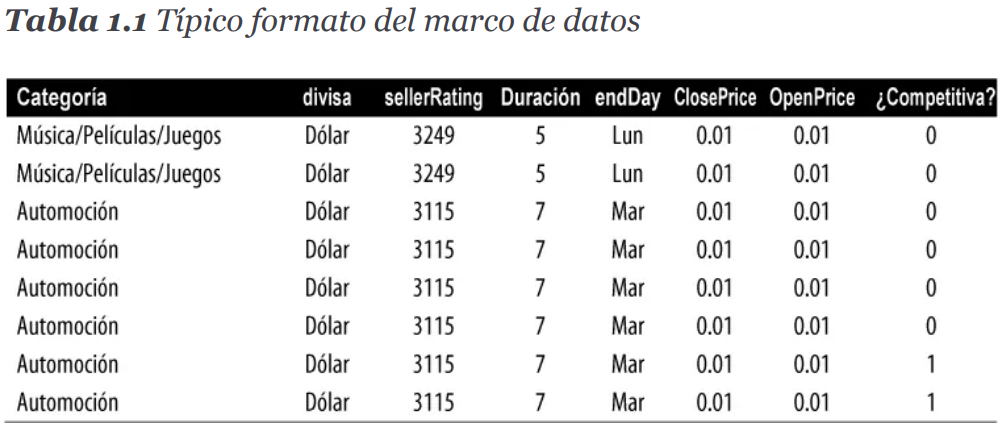

En la tabla 1.1, hay una combinación de datos medidos o contabilizados (por ejemplo, duración y
precio) y datos categóricos (por ejemplo, categoría y divisa). Como se ha mencionado
anteriormente, una forma especial de variable categórica es una variable binaria (sí/no o 0/1 como se ve en la columna de la derecha en la tabla 1.1, una variable indicadora que muestra si una
subasta ha sido competitiva (si ha tenido varios postores) o no. Esta variable indicadora también
resulta ser una variable de resultado (outcome), cuando el escenario es pronosticar si una subasta
es competitiva o no.),

### Marcos de datos e índices
Las tablas de bases de datos tradicionales tienen una o más columnas designadas como índice,
esencialmente un número de fila. Esta funcionalidad puede mejorar enormemente la eficiencia de
determinadas consultas a bases de datos. *En Python, con la biblioteca de pandas, la estructura
básica de datos rectangulares es el objeto DataFrame*. Por defecto, se crea un índice de enteros
automático para un DataFrame basado en el orden de las filas. En pandas, también es posible
establecer índices jerárquicos/multinivel para mejorar la eficiencia de ciertas operaciones.
En R, la estructura básica de datos rectangulares es el objeto data.frame. data.frame también tiene
un índice implícito de enteros basado en el orden de las filas. El data.frame nativo de R no admite
índices especificados por el usuario o multinivel, aunque se puede crear una clave personalizada
mediante el atributo row.names. Para superar esta deficiencia, hay dos nuevos paquetes que se
están utilizando de forma generalizada: data.table y dplyr. Ambos admiten índices multinivel y
ofrecen importantes aumentos de velocidad cuando se trabaja con data.frame.


### Diferencias terminológicas
La terminología de datos rectangulares puede resultar confusa. Los estadísticos y los
científicos de datos usan términos diferentes para referirse al mismo concepto. Para un
estadístico, las variables predictoras (predictor variables) se utilizan en un modelo para
pronosticar una respuesta (response) o variable dependiente (dependent variable). Para un
científico de datos, las características (features) se utilizan para pronosticar un objetivo
(target). Los sinónimos resultan particularmente confusos: los informáticos usarán el término
muestra (sample) para una única fila. Una muestra (sample) para un estadístico es una
colección de filas.

# Estructuras de datos no rectangulares
Existen otras estructuras de datos además de los datos rectangulares
Los datos de serie de tiempo registran mediciones sucesivas de la misma variable. Es la materia
prima de los métodos de pronóstico estadístico y también es un componente clave de los datos
generados por los dispositivos del Internet de las cosas.
Las estructuras de datos espaciales, que se utilizan en cartografía y análisis de la localización, son
más complejas y variadas que las estructuras de datos rectangulares. En la representación del
objeto (object), el foco de los datos es un objeto (por ejemplo, una casa) y sus coordenadas
espaciales. La vista de campo (field), por el contrario, se centra en pequeñas unidades de espacio y
el valor de la métrica correspondiente (brillo de píxeles, por ejemplo).
Las estructuras de datos en forma de gráficos (o redes) se utilizan para representar relaciones
físicas, sociales y abstractas. Por ejemplo, un gráfico de una red social, como Facebook o LinkedIn,
puede representar conexiones entre personas en la red. Los centros de distribución conectados
por carreteras son un ejemplo de una red física. Las estructuras de gráficos son útiles para ciertos
tipos de problemas, como la optimización de redes o los sistemas de recomendación.
Cada uno de estos tipos de datos tiene su metodología especializada en ciencia de datos. El
enfoque de este libro se centra en los datos rectangulares, el bloque de construcción fundamental
del modelado predictivo.
.

### Gráficos en estadística
En informática y tecnologías de la información, el término gráfico (graph) hace referencia
normalmente a la descripción de las conexiones entre entidades y a la estructura de datos
subyacente. En estadística, gráfico (graph) se utiliza para referirse a una variedad de
diagramas y visualizaciones (visualizations), no solo de conexiones entre entidades, aunque el
término se aplica solo a la visualización, no a la estructura de datos.

**Ideas clave:**

La estructura de datos básica en ciencia de datos es una matriz rectangular en la que las filas
están formadas por registros y las columnas son las variables (características).
La terminología puede resultar confusa. Existe una serie de sinónimos, procedentes de
diferentes disciplinas, que contribuyen a la ciencia de datos (estadística, informática y
tecnologías de la información).

#### Lecturas complementarias
Documentación sobre marcos de datos en R (https://stat.ethz.ch/R-manual/Rdevel/library/base/html/data.frame.html).
Documentación sobre marcos de datos en Python (https://pandas.pydata.org/pandasdocs/stable/user_guide/dsintro.html).

#### Estimación de la localización
Las variables, con los datos medidos o procedentes de recuentos, pueden tener miles de valores
distintos. 
* *Un paso fundamental para explorar los datos es obtener un "valor típico" para cada
característica (variable): una estimación de dónde se encuentra la mayoría de los datos (es decir,
su tendencia central)*.


#### Términos clave de la estimación de la localización

**Media**
Suma de todos los valores dividida por el número de valores.
Sinónimos
promedio

**Media ponderada**
Suma de todos los valores multiplicados por cada ponderación y dividida por la suma de las
ponderaciones.
Sinónimo
promedio ponderado

**Mediana**
Valor tal que la mitad del número de datos se encuentra por encima y la otra mitad por
debajo de dicho valor.
Sinónimo
Percentil 50
Percentil
Valor tal que el P por ciento de los datos se encuentra por debajo del mismo.
Sinónimo
cuantil

**Mediana ponderada**
Valor tal que la mitad de la suma de las ponderaciones se encuentra por encima y la otra
mitad por debajo de los datos ordenados.

**Media recortada**
El promedio de todos los valores después de eliminar un número fijo de valores extremos.
Sinónimo
media truncada

**Robusto**
Insensible a valores extremos.
Sinónimo
resistente

**Atípico**
Valor de un dato que es muy diferente de la mayoría de los valores de datos.
Sinónimo
valor extremo

A primera vista, resumir los datos puede parecer bastante trivial: simplemente hay que extraer la
media (mean) de los datos. De hecho, si bien la media es fácil de calcular y conveniente de usar, es
posible que no siempre sea la mejor medida para representar un valor central. Por esta razón, los
estadísticos han desarrollado y promovido varias estimaciones alternativas a la media.

# Métricas y estimaciones
Los estadísticos a menudo utilizan el término estimación (estimate) para referirse a un valor
calculado a partir de los datos disponibles, para establecer una distinción entre lo que vemos a
partir de los datos y el verdadero estado teórico o exacto de las cosas. Es más probable que los
científicos de datos y los analistas de negocios se refieran a este valor como métrica (metric).
La diferencia refleja el enfoque de la estadística frente al de la ciencia de datos. Hay que tener
en cuenta que la explicación de la incertidumbre se encuentra en el corazón de la disciplina de
la estadística, mientras que el foco de la ciencia de datos son los objetivos concretos de las organizaciones o de las empresas. Por lo tanto, los estadísticos estiman y los científicos de
datos miden.


1. **Estimación (Estimate):** En estadística, cuando se habla de estimación, se refiere a la obtención de una valor a partir de los datos disponibles. Los estadísticos utilizan el término "estimación" para describir cómo calculan un valor que representa una propiedad desconocida o no observada de la población total. La estimación se centra en proporcionar una aproximación del valor real basada en la muestra disponible.
2. **Métrica (Metric):** En el contexto de ciencia de datos, el término "metrica" se utiliza más comúnmente. Aquí, se refiere a una medida cuantitativa especifica que se utiliza para evaluar el rendimiento, el éxito o cualquier otro aspecto medible en el contexto de los objetivos de una organización o empresa. Las métricas son herramientas clave para medir el progreso hacia los objetivos y tomar decisiones basadas en datos.

La diferencia subyacente es que, mientras que los estadísticos tienden a enfocarse en la estimación de parámetros desconocidos utilizando métodos estadísticos y abordan la incertidumbre asociada, los científicos de datos tienden a medir métricas específicas que están directamente relacionadas con los objetivos y metas organizacionales, sin enfocarse tanto en la incertidumbre estadística.

En resumen, los estadísticos estiman para proporcionar aproximaciones basadas en datos, mientras que los cientificos de datos miden métricas especificas para evaluar el rendimiento y tomar decisiones informadas.

# Media

La estimación más básica de la ubicación es la media, o valor promedio. La media es la suma de todos los valores dividida por la cantidad de valores. Considera el siguiente conjunto de números: {3, 5, 1, 2}. La media es (3 + 5 + 1 + 2) / 4 = 11 / 4 = 2.75. Te encontrarás con el símbolo $\bar{x}$ (pronunciado "x-barra") utilizado para representar la media de una muestra de una población. La fórmula para calcular la media para un conjunto de $ n $ valores $ x_1, x_2, ..., x_n $ es:

$$ \text{Mean} = \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n} $$

Donde:

- $ Mean $ : es la media.
- $ n $ : Es el número total de valores en el conjunto.
- $ x_i $ : son los valores individuales en el conjunto.

En resumen, la media se obtiene sumando todos los valores y dividiendo el resultado por la cantidad de valores en el conjunto.

**Ejemplo de Media:**

Considera el siguiente conjunto de calificaciones en matemáticas para cuatro estudiantes: {85, 92, 78, 88}. Queremos calcular la media de estas calificaciones.

La fórmula para la media ($\bar{x}$) es:

$$ \text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n} $$

Donde:

- $n$ es el número total de valores en el conjunto.
- $x_i$ son los valores individuales en el conjunto.

Aplicamos la fórmula:

$$ \text{Mean} = \frac{85 + 92 + 78 + 88}{4} = \frac{343}{4} = 85.75 $$

Por lo tanto, la media de estas calificaciones en matemáticas es $85.75$. Esto indica que, en promedio, los estudiantes obtuvieron una puntuación de aproximadamente $85.75$ en la materia.

**Nota:**

$N$ (o $n$) se refiere al número total de registros u observaciones. En estadísticas, se escribe con mayúscula cuando se refiere a una población y con minúscula cuando se refiere a una muestra de una población. En la ciencia de datos, esa distinción no es crucial, por lo que puedes verlo de ambas maneras.

# Media Truncada
Una variación de la media es la **media truncada**, que se calcula eliminando un número fijo de valores ordenados en cada extremo y luego tomando un promedio de los valores restantes. Representando los valores ordenados como $x_1, x_2, ..., x_n$, donde $x_1$ es el valor más pequeño y $x_n$ el más grande, la fórmula para calcular la media truncada con los $p$ valores más pequeños y más grandes omitidos es:

$$ {Media\ truncada} = \bar{x} = \frac{\sum_{i = p + 1}^{n - p} x_i}{n - 2p} $$

Donde:

- ${Media\ truncada}$ : Es la media truncada.
- $n$ : Es el número total de valores.
- $p$ : Es el número de valores que se eliminan de cada extremo de la secuencia ordenada.

**Ejemplo de Media Truncada:**

Supongamos que tenemos un conjunto de datos representando el tiempo (en minutos) que diferentes personas tardaron en completar una tarea. Los tiempos son los siguientes (ordenados de menor a mayor): {12, 15, 18, 20, 22, 25, 30}.

Queremos calcular la media truncada al omitir los dos valores más pequeños y los dos valores más grandes. Entonces, $p = 2$.

La fórmula para la media truncada es:

$$ {Media\ truncada} = \frac{\sum_{i = p + 1}^{n - p} x_i}{n - 2p} $$

Sustituimos los valores:

$$ {Media\ truncada} = \frac{18 + 20 + 22}{7 - 4} = \frac{60}{3} = 20 $$

Por lo tanto, la media truncada de estos tiempos es $20$. Esto significa que, al eliminar los dos valores más pequeños y los dos valores más grandes, el tiempo promedio que tomaron las personas en completar la tarea fue de $20$ minutos. Este enfoque puede ser útil para mitigar el impacto de valores extremos en la estimación de la tendencia central.

Una media truncada elimina la influencia de valores extremos. Por ejemplo, en clavados internacionales, se eliminan la puntuación más alta y la más baja de cinco jueces, y la puntuación final es el promedio de las puntuaciones de los tres jueces restantes. Esto dificulta que un solo juez manipule la puntuación, quizás para favorecer al concursante de su país. Las medias truncadas son ampliamente utilizadas y, en muchos casos, son preferibles al uso de la media ordinaria. Consulta "Mediana y Estimaciones Robustas" en la página 10 para obtener más información.

# Media Ponderada

Otro tipo de media es la **media ponderada**, que se calcula multiplicando cada valor de datos $x_i$ por un peso $w_i$ especificado por el usuario y dividiendo la suma de estos productos por la suma de los pesos. La fórmula para una media ponderada es:

$$ {Media\ ponderada} = \bar{x}_w = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i} $$

Donde:

- $ {Media\ ponderada} $ : Es la media ponderada.
- $ n $ : Es el número total de valores.
- $ w_i $ : Es el peso asociado al valor $x_i$.

**Ejemplo de Media Ponderada:**

Supongamos que tenemos un conjunto de datos que representa las calificaciones de un estudiante en tres asignaturas: Matemáticas, Ciencias e Inglés. Las calificaciones son {90, 85, 88}, y queremos calcular la media ponderada, dándole más peso a la calificación de Matemáticas.

Asignamos pesos a cada asignatura: $w_{\text{Mat}} = 2$, $w_{\text{Cien}} = 1$, $w_{\text{Ing}} = 1$.

La fórmula para la media ponderada es:

$$ {Media\ ponderada} = \frac{\sum_{i=1}^{n} w_i x_i}{\sum_{i=1}^{n} w_i} $$

Sustituimos los valores:

$$ {Media\ ponderada} = \frac{2 \times 90 + 1 \times 85 + 1 \times 88}{2 + 1 + 1} = \frac{180 + 85 + 88}{4} = \frac{353}{4} = 88.25 $$

Por lo tanto, la media ponderada de las calificaciones es $88.25$. Esto significa que la calificación de Matemáticas, con un peso más alto, contribuye significativamente a la media ponderada.

Hay dos motivaciones principales para usar una **media ponderada**:

1. **Algunos valores son intrínsecamente más variables que otros:** Las observaciones altamente variables se ponderan menos. Por ejemplo, si estamos calculando el promedio de múltiples sensores y uno de los sensores es menos preciso, podríamos reducir el peso de los datos de ese sensor.

2. **Los datos recopilados no representan equitativamente los diferentes grupos de interés:** Por ejemplo, debido a la forma en que se llevó a cabo un experimento en línea, es posible que no tengamos un conjunto de datos que refleje con precisión todos los grupos en la base de usuarios. Para corregir eso, podemos dar un peso mayor a los valores de los grupos que estaban subrepresentados.

# Estimaciones Medianas y Robustas

La mediana es el número central en una lista ordenada de datos. Si hay un número par de valores de datos, el valor central es uno que no está realmente en el conjunto de datos, sino más bien el promedio de los dos valores que dividen los datos ordenados en mitades superior e inferior. En comparación con la media, que utiliza todas las observaciones, la mediana depende solo de los valores en el centro de los datos ordenados. Aunque esto podría parecer una desventaja, ya que la media es mucho más sensible a los datos, hay muchas instancias en las que la mediana es una métrica mejor para la ubicación. Supongamos que queremos examinar los ingresos familiares típicos en vecindarios alrededor del lago Washington en Seattle. Al comparar el vecindario de Medina con el vecindario de Windermere, el uso de la media produciría resultados muy diferentes porque Bill Gates vive en Medina. Si usamos la mediana, no importará cuán rico sea Bill Gates, la posición de la observación central seguirá siendo la misma.

Por las mismas razones por las que se utiliza una media ponderada, también es posible calcular una mediana ponderada. Al igual que con la mediana, primero ordenamos los datos, aunque cada valor de datos tiene un peso asociado. En lugar del número central, la mediana ponderada es un valor tal que la suma de los pesos es igual para las mitades inferior y superior de la lista ordenada. Al igual que la mediana, la mediana ponderada es robusta frente a valores atípicos.

### Valores Atípicos "Outliers"

La mediana se denomina una estimación robusta de la ubicación, ya que no se ve afectada por valores atípicos (casos extremos) que podrían sesgar los resultados. Un valor atípico es cualquier valor que esté muy alejado de los demás valores en un conjunto de datos. La definición exacta de un valor atípico es algo subjetiva, aunque se utilizan ciertas convenciones en diversos resúmenes y gráficos de datos (consulte "Percentiles y Boxplots" en la página 20). Ser un valor atípico en sí mismo no hace que un valor de datos sea inválido o erróneo (como en el ejemplo anterior con Bill Gates). Sin embargo, los valores atípicos suelen ser el resultado de errores de datos, como la mezcla de datos de diferentes unidades (kilómetros versus metros) o lecturas incorrectas de un sensor. Cuando los valores atípicos son el resultado de datos incorrectos, la media dará como resultado una estimación deficiente de la ubicación, mientras que la mediana seguirá siendo válida. En cualquier caso, los valores atípicos deben identificarse y suelen merecer una investigación adicional.

#### Detección de Anomalías

A diferencia del análisis de datos típico, donde los valores atípicos a veces son informativos y a veces molestos, en la detección de anomalías los puntos de interés son los valores atípicos, y la mayor parte de los datos sirve principalmente para definir lo "normal" contra lo cual se miden las anomalías.

La mediana no es la única estimación robusta de la ubicación. De hecho, se utiliza ampliamente una media recortada para evitar la influencia de los valores atípicos. Por ejemplo, *recortar el 10% inferior y superior de los datos (una elección común) proporcionará protección contra valores atípicos en todos los conjuntos de datos excepto en los más pequeños*. La media recortada se puede entender como un compromiso entre la mediana y la media: es robusta ante valores extremos en los datos, pero utiliza más datos para calcular la estimación de la ubicación.

#### Otros Indicadores Robustos de Ubicación

Los estadísticos han desarrollado una gran cantidad de otros estimadores de ubicación, principalmente con el objetivo de crear un estimador más robusto que la media y también más eficiente (es decir, mejor capacitado para discernir pequeñas diferencias de ubicación entre conjuntos de datos). Aunque estos métodos son potencialmente útiles para conjuntos de datos pequeños, es poco probable que proporcionen beneficios adicionales para conjuntos de datos grandes o incluso de tamaño moderado.

In [25]:
medal_count = pd.read_excel("DATA/Medals.xlsx")    # Importamos los datos a una dataframe
medal_count    # Llamamos el DataFrame

C:\Users\HP\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


#### Estimación de ubicación

#### Media

In [26]:
# Mean - Promedio

medal_count["Total"].mean()    # Dela DataFrame medal_count, llama a la columnas Total y calcula mean

11.612903225806452

#### Media Ponderada

In [27]:
# Ponderación del numero objetivo promedio por el número total

np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

Este comentario explica que estás utilizando la función `np.average` para calcular un promedio ponderado, donde los valores en la columna "Gold" son ponderados por los valores correspondientes en la columna "Total". Esto puede ser útil para obtener un promedio ponderado basado en alguna métrica específica.

#### Media Truncada

In [28]:
from scipy.stats import trim_mean

# Calcula la media trucada del DataFrame medal_count de la columna Gold con un 10% de supresión en ambos extremos
trim_mean(medal_count["Gold"], 0.1)

1.96

#### Mediana

In [29]:
# Del DataFrame medal_count, llama a la columna Total y calcula la mediana

medal_count["Total"].median()

4.0

#### Mediana Ponderada

In [30]:
# Definición de la función para calcular la mediana ponderada
def weighted_median(df, median_col, weight_col):
    # Ordenar el DataFrame según la columna de la mediana
    df_sorted = df.sort_values(median_col)

    # Calcular la suma acumulativa de los pesos
    cumsum = df_sorted[weight_col].cumsum()

    # Calcular el punto de corte para la mediana ponderada
    cutoff = df_sorted[weight_col].sum() / 2.

    # Devolver el valor de la mediana ponderada
    return df_sorted[cumsum >= cutoff][median_col].iloc[0]

# Llamada a la función con el DataFrame 'medal_count', la columna 'Total' como mediana y la columna 'Gold' como peso
weighted_median(medal_count, "Total", "Gold")

40

### Ejemplo: Estimaciones de Ubicación de la Población y Tasas de Asesinatos

La Tabla 1-2 muestra las primeras filas del conjunto de datos que contiene la población y las tasas de asesinatos (en unidades de asesinatos por 100,000 personas por año) para cada estado de EE. UU. (Censo de 2010).

**Tabla 1-2.** Algunas filas del marco de datos 'state' de población y tasa de homicidios por estado.

In [31]:
state = pd.read_csv("data/state.csv")    # Cargamos el archivo csv

In [32]:
print(state.head(8))    # Imprimimos las primeras 8 filas

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


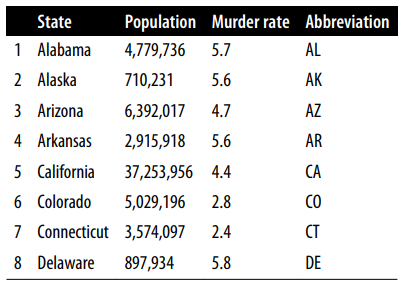

Calcular la media, la media recortada y la mediana para la población utilizando R.

    > state <- read.csv('state.csv')
    > mean(state[['Population']])
    [1] 6162876
    > mean(state[['Population']], trim=0.1)
    [1] 4783697
    > median(state[['Population']])
    [1] 4436370


Para calcular la media y la mediana en Python, podemos utilizar los métodos de pandas en el marco de datos. Para la media recortada, se requiere la función trim_mean en scipy.stats:

In [33]:
state = pd.read_csv("data/state.csv")    # Cargamos el archivo csv

#### Media

In [34]:
state["Population"].mean()    # Calculamos la media de la columnas Population

6162876.3

#### Media Truncada

In [35]:
trim_mean(state["Population"],0.1)    # Calcula la media truncada de la columna Population

4783697.125

#### Mediana

In [36]:
state["Population"].median()    # Calcula la mediana de la columna Population

4436369.5

La media es mayor que la media recortada, que es mayor que la mediana. Esto se debe a que la media recortada excluye los cinco estados más grandes y más pequeños (trim=0.1 elimina el 10% de cada extremo). Si queremos calcular la tasa de homicidios promedio para el país, necesitamos usar una media ponderada o mediana para tener en cuenta las diferentes poblaciones en los estados. Dado que R básico no tiene una función para la mediana ponderada, necesitamos instalar un paquete como matrixStats:

    > weighted.mean(state[['Murder.Rate']], w=state[['Population']])
    [1] 4.445834
    > library('matrixStats')
    > weightedMedian(state[['Murder.Rate']], w=state[['Population']])
    [1] 4.4


La media ponderada está disponible con NumPy. Para la mediana ponderada, podemos utilizar el paquete especializado wquantiles:

#### Media Ponderada

In [37]:
# Calculamos el promedio ponderado de la tasa de homicidios en el DataFrame 'state'.
# La ponderación se realiza utilizando la columna 'Population' del DataFrame 'state'.

np.average(state["Murder.Rate"], weights=state["Population"])

4.445833981123393

1. `state["Murder.Rate"]`: Accede a la columna "Murder.Rate" en el DataFrame `state`. Esto devuelve una serie que contiene la tasa de homicidios para cada estado.

2. `state["Population"]`: Accede a la columna "Population" en el DataFrame `state`. Esto devuelve una serie que contiene la población para cada estado.

3. `np.average(...)`: Utiliza la función `average` de NumPy para calcular la media ponderada de la columna "Murder.Rate" utilizando las ponderaciones proporcionadas por la columna "Population".

   - `state["Murder.Rate"]`: Es la serie de tasas de homicidio.
   - `weights=state["Population"]`: Especifica que las ponderaciones para calcular la media deben ser tomadas de la columna "Population".

#### Mediana Ponderada

In [38]:
# Calculamos la mediana ponderada utilizando wquantiles.median.
# La columna 'Murder.Rate' del DataFrame 'state' actúa como la mediana,
# y la columna 'Population' se utiliza como pesos en el cálculo.

wquantiles.median(state["Murder.Rate"], weights=state["Population"])

4.4

1. `state["Murder.Rate"]`: Accede a la columna "Murder.Rate" en el DataFrame `state`. Esto devuelve una serie que contiene la tasa de homicidios para cada estado.

2. `state["Population"]`: Accede a la columna "Population" en el DataFrame `state`. Esto devuelve una serie que contiene la población para cada estado.

3. `wquantiles.median(...)`: Utiliza la función `median` de la biblioteca `wquantiles` para calcular la mediana ponderada.

   - `state["Murder.Rate"]`: Es la serie de tasas de homicidio.
   - `weights=state["Population"]`: Especifica que las ponderaciones para calcular la mediana deben ser tomadas de la columna "Population".

En resumen, esta línea de código calcula la mediana ponderada de la tasa de homicidios por estado, utilizando la población como ponderación. La mediana ponderada es una medida de tendencia central que tiene en cuenta las ponderaciones, dándole más peso a las observaciones con mayores ponderaciones (en este caso, poblaciones más grandes).

#### Percentil

In [39]:
# Calculamos el tercer cuartil (Q3) de la columna 'Total' en el DataFrame 'medal_count'.

q3 = np.percentile(medal_count["Total"], 75)
q3

11.0

#### describe()

In [40]:
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


En este caso, la media ponderada y la mediana ponderada son aproximadamente iguales.

#### Ideas Clave:

* La métrica básica para la ubicación es la media, pero puede ser sensible a valores extremos (valores atípicos).
* Otras métricas (mediana, media recortada) son menos sensibles a valores atípicos y distribuciones inusuales, por lo tanto, son más robustas.

#### Lecturas Adicionales:

* El artículo de Wikipedia sobre tendencia central contiene una discusión extensa de varias medidas de ubicación.
* El clásico Exploratory Data Analysis (Análisis Exploratorio de Datos) de John Tukey de 1977 (Pearson) aún se lee ampliamente.

# Estimaciones de Variabilidad

La ubicación es solo una dimensión en la síntesis de una característica. Una segunda dimensión, la variabilidad, también conocida como dispersión, mide si los valores de los datos están agrupados de manera estrecha o dispersa. En el corazón de la estadística yace la variabilidad: medirla, reducirla, distinguir la variabilidad aleatoria de la real, identificar las diversas fuentes de variabilidad real y tomar decisiones en su presencia.

### Términos Clave para Métricas de Variabilidad

#### Desviaciones

La diferencia entre los valores observados y la estimación de la ubicación.
Sinónimos
errores, residuos.

#### Varianza

La suma de las desviaciones al cuadrado de la media dividida por $n - 1$, donde $n$ es el número de valores de datos. Sinónimo
error cuadrático medio.

#### Desviación estándar

La raíz cuadrada de la varianza.

#### Desviación media absoluta

La media de los valores absolutos de las desviaciones respecto a la media.
Sinónimos
norma $l1$, norma de Manhattan.

#### Desviación mediana absoluta respecto a la mediana

La mediana de los valores absolutos de las desviaciones respecto a la mediana.

#### Rango

La diferencia entre el valor más grande y el más pequeño en un conjunto de datos.

#### Estadísticas de orden

Métricas basadas en los valores de datos ordenados de menor a mayor.
Sinónimo
rango.

#### Percentil

El valor tal que $P$ por ciento de los valores son iguales o menores a este valor y $(100-P)$ por ciento son iguales o mayores a este valor.
Sinónimo
cuantil.

#### Rango intercuartílico

La diferencia entre el percentil 75 y el percentil 25.
Sinónimo
RIQ.

Así como existen diferentes formas de medir la ubicación (media, mediana, etc.), también hay diferentes formas de medir la variabilidad.

# Desviación Estándar y Estimaciones Relacionadas

Las estimaciones más ampliamente utilizadas de la variación se basan en las diferencias, o desviaciones, entre la estimación de la ubicación y los datos observados. Para un conjunto de datos {1, 4, 4}, la media es 3 y la mediana es 4. Las desviaciones respecto a la media son las diferencias: 1 - 3 = -2, 4 - 3 = 1, 4 - 3 = 1. *Estas desviaciones nos dicen cuán dispersos están los datos alrededor del valor central*. Una forma de medir la variabilidad es estimar un valor típico para estas desviaciones.

Calcular el promedio de las desviaciones en sí mismas no nos diría mucho: las desviaciones negativas compensan a las positivas. De hecho, la suma de las desviaciones respecto a la media es precisamente cero. En cambio, un enfoque simple es tomar el promedio de los valores absolutos de las desviaciones respecto a la media. En el ejemplo anterior, el valor absoluto de las desviaciones es {2, 1, 1}, y su promedio es (2 + 1 + 1) / 3 = 1.33. Esto se conoce como la *desviación media absoluta* y se calcula con la fórmula:

$$ {Desviación\ Media\ Absoluta} = \frac{\sum_{i=1}^{n} |x_i - \bar{x}|}{n} $$

donde:
- $n$ es el número de observaciones en el conjunto de datos,
- $x_i$ es cada valor individual en el conjunto de datos,
- $ \bar{x}$ es la media del conjunto de datos
- $| \cdot |$ representa el valor absoluto.


Las estimaciones más conocidas de la variabilidad son la $varianza$ y la $desviación\ estándar$, que se basan en desviaciones al cuadrado. La $varianza$ *es un promedio de las desviaciones al cuadrado*, y la $desviación\ estándar$ *es la raíz cuadrada de la varianza*:

$$ {Varianza} = s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1} $$

$$ {Desviación\ estándar} = s = \sqrt{\text{Varianza}} $$

La desviación estándar es mucho más fácil de interpretar que la varianza, ya que está en la misma escala que los datos originales. Aun así, con su fórmula más complicada y menos intuitiva, podría parecer peculiar que la desviación estándar sea preferida en estadísticas sobre la desviación media absoluta. Su preeminencia se debe a la teoría estadística: matemáticamente, trabajar con valores al cuadrado es mucho más conveniente que con valores absolutos, especialmente para modelos estadísticos.

#### Grados de libertad y ¿ $n$ o $n - 1$ ?

En los libros de estadística, siempre hay alguna discusión sobre por qué tenemos $n - 1$ en el denominador en la fórmula de la varianza, en lugar de $n$, lo que nos lleva al concepto de grados de libertad. Esta distinción no es importante ya que $n$ generalmente es lo suficientemente grande como para que no haga mucha diferencia si divides por $n$ o por $n - 1$ . Pero en caso de que estés interesado, aquí está la historia. Se basa en la premisa de que quieres hacer estimaciones sobre una población, basadas en una muestra.

Si usas el denominador intuitivo de $n$ en la fórmula de la varianza, subestimarás el valor real de la varianza y la desviación estándar en la población. Esto se llama una estimación sesgada. Sin embargo, si divides por $n - 1$ en lugar de $n$, la varianza se convierte en una estimación no sesgada. Para explicar completamente por qué usar $n$ lleva a una estimación sesgada, se involucra la noción de grados de libertad, que tiene en cuenta el número de restricciones al calcular una estimación. En este caso, hay $n - 1$ grados de libertad ya que hay una restricción: la desviación estándar depende del cálculo de la media muestral. Para la mayoría de los problemas, los científicos de datos no necesitan preocuparse por los grados de libertad.

Ni la varianza, ni la desviación estándar, ni la desviación media absoluta son robustas ante valores atípicos y extremos (ver "Mediana y Estimaciones Robustas" en la página 10 para una discusión sobre estimaciones robustas para la ubicación). La varianza y la desviación estándar son especialmente sensibles a los valores atípicos, ya que se basan en las desviaciones al cuadrado. Una estimación robusta de la variabilidad es la **desviación mediana absoluta respecto a la mediana** o MAD (por sus siglas en inglés):

$$ Desviación\ mediana\ absoluta = Mediana(|x1 - m|, |x2 - m|, ..., |xN - m|) $$

donde $m$ es la mediana. Al igual que la mediana, la MAD no se ve afectada por valores extremos. También es posible calcular una desviación estándar recortada de manera análoga a la media recortada (ver "Media" en la página 9).

**Nota:**

La varianza, la desviación estándar, la desviación media absoluta y la desviación mediana absoluta respecto a la mediana no son estimaciones equivalentes, incluso en el caso de que los datos provengan de una distribución normal. De hecho, la desviación estándar siempre es mayor que la desviación media absoluta, que a su vez es mayor que la desviación mediana absoluta. A veces, la desviación mediana absoluta se multiplica por un factor de escala constante para poner la MAD en la misma escala que la desviación estándar en el caso de una distribución normal. El factor comúnmente utilizado de 1.4826 significa que el 50% de la distribución normal cae dentro del rango ±MAD (ver, por ejemplo, https://oreil.ly/SfDk2).

### Estimaciones basadas en percentiles

Un enfoque diferente para estimar la dispersión se basa en examinar la extensión de los datos ordenados. Las estadísticas basadas en datos ordenados (clasificados) se conocen como estadísticas de orden. La medida más básica es el **rango**: la diferencia entre los números más grandes y más pequeños. Conocer los valores **mínimo** y **máximo** es útil y ayuda a identificar valores atípicos, pero el rango es extremadamente sensible a los valores atípicos y no es muy útil como medida general de dispersión en los datos.

Para evitar la sensibilidad a los valores atípicos, podemos observar el rango de los datos después de excluir valores de cada extremo. Formalmente, este tipo de estimaciones se basan en diferencias entre percentiles. En un conjunto de datos, el percentil P es un valor tal que al menos P por ciento de los valores toman este valor o menos, y al menos $(100 - P)$ por ciento de los valores toman este valor o más. Por ejemplo, para encontrar el percentil 80, ordena los datos. Luego, comenzando desde el valor más pequeño, avanza un 80 por ciento hacia el valor más grande. Observa que la mediana es lo mismo que el percentil 50. El **percentil** es esencialmente lo mismo que un cuantil, con cuantiles indexados por fracciones (por lo que el cuantil 0.8 es lo mismo que el percentil 80).

Una medida común de variabilidad es la diferencia entre el percentil 25 y el percentil 75, llamada **rango intercuartílico** (o IQR). Aquí tienes un ejemplo simple: {3,1,5,3,6,7,2,9}. Los ordenamos para obtener {1,2,3,3,5,6,7,9}. El percentil 25 está en 2.5 y el percentil 75 está en 6.5, por lo que el rango intercuartílico es 6.5 - 2.5 = 4. El software puede tener enfoques ligeramente diferentes que arrojan respuestas diferentes (ver el consejo siguiente); típicamente, estas diferencias son pequeñas.

Para conjuntos de datos muy grandes, calcular percentiles exactos puede ser computacionalmente muy costoso, ya que requiere ordenar todos los valores de datos. El aprendizaje automático y el software estadístico utilizan algoritmos especiales, como [Zhang-Wang-2007], para obtener un percentil aproximado que se puede calcular muy rápidamente y que garantiza cierta precisión.

### Percentil: Definición precisa

Si tenemos un número par de datos $(n es par)$, entonces el percentil es ambiguo bajo la definición anterior. De hecho, podría tomar cualquier valor entre las estadísticas de orden $xj$ y $xj+1$, donde $j$ satisface:

$$100 \times \frac{j}{n} \leq P < 100 \times \frac{j+1}{n}$$

Formalmente, el percentil es el promedio ponderado:

$$ {Percentile }\ (P) = (1 - w) \times x_j + w \times x_{j+1} $$

donde \(w\) es un peso entre 0 y 1. El software estadístico tiene enfoques ligeramente diferentes para elegir \(w\). De hecho, la función quan​tile de R ofrece nueve alternativas diferentes para calcular el cuantil. Excepto para conjuntos de datos pequeños, generalmente no es necesario preocuparse por la forma precisa en que se calcula un percentil. En el momento de escribir esto, la función numpy.quantile de Python admite solo un enfoque, la interpolación lineal.

#### Varianza

In [41]:
# Calculamos la varianza de la columna 'Gold' en el DataFrame 'medal_count'.

variance_gold = np.var(medal_count["Gold"])
variance_gold

48.78483061625627

#### Desviación Standard

In [46]:
import numpy as np
import pandas as pd

In [48]:
# Calculamos la desviación estándar de la columna 'Gold' en el DataFrame 'medal_count'
standard_deviation_gold = np.std(medal_count["Gold"])
standard_deviation_gold

6.984613848757587

#### Desviación media absoluta

In [50]:
# Calculamos la desviación media absoluta (MAD) de la columna 'Gold' en el DataFrame 'medal_count'.

mad_gold = np.mean(np.absolute(medal_count["Gold"] - np.mean(medal_count["Gold"])))
mad_gold

4.0048560527228565

#### Desviación mediana absoluta

In [44]:
from numpy import median, absolute

# Calculamos la desviación mediana absoluta (MAD) de la columna 'Gold' en el DataFrame 'medal_count'.
mad_median_gold = median(absolute(medal_count["Gold"] - median(medal_count["Gold"])))
mad_median_gold

1.0

#### Rango Interquartiles

In [52]:
# Calculamos el rango intercuartílico (IQR) de la columna 'Gold' en el DataFrame 'medal_count'.
# Q3 representa el tercer cuartil y Q1 representa el primer cuartil.
# El IQR se calcula como la diferencia entre el tercer y el primer cuartil.

q3, q1 = np.percentile(medal_count["Gold"], [75, 25])
iqr = q3 - q1
iqr

3.0

### Ejemplo: Estimaciones de Variabilidad de la Población Estatal

La Tabla 1-3 (repetida de la Tabla 1-2 por conveniencia) muestra las primeras filas en el conjunto de datos que contiene la población y las tasas de homicidios para cada estado.

**Tabla 1-3.** Algunas filas del data.frame "state" con información sobre la población y la tasa de homicidios por estado.

In [53]:
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


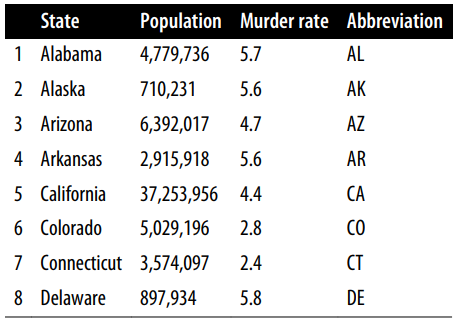

Usando las funciones incorporadas de R para la desviación estándar, el rango intercuartílico (IQR) y la desviación absoluta mediana (MAD), podemos calcular estimaciones de variabilidad para los datos de población estatal:

    > sd(state[['Population']])
    [1] 6848235
    > IQR(state[['Population']])
    [1] 4847308
    > mad(state[['Population']])
    [1] 3849870


El marco de datos de pandas proporciona métodos para calcular la desviación estándar y los cuantiles. Utilizando los cuantiles, podemos determinar fácilmente el rango intercuartílico (IQR). Para la robusta Desviación Absoluta Mediana (MAD), utilizamos la función `robust.scale.mad` del paquete statsmodels:

### Desviación Estandard

In [54]:
state["Population"].std()    # Calculamos del desviación standard del DF state, columna Population

6848235.347401142

- `state`: Esto parece ser un DataFrame o una Serie de Pandas que contiene datos, y "Population" parece ser el nombre de una columna en ese DataFrame o Serie.

- `["Population"]`: Esto es la indexación de la columna "Population" en el DataFrame o Serie. Está extrayendo la columna llamada "Population" del DataFrame o Serie.

- `.std()`: Este es un método de Pandas que se utiliza para calcular la desviación estándar de los valores en una Serie o columna de un DataFrame. En este caso, se está calculando la desviación estándar de la columna "Population" en el DataFrame o Serie llamado `state`.

En resumen, la línea de código está calculando la desviación estándar de la columna "Population" en el DataFrame o Serie llamado `state`. La desviación estándar es una medida de la dispersión de los valores en una serie de datos, indicando cuán dispersos están los valores con respecto a la media.

### El rango intercuartílico se calcula como la diferencia entre el cuantil 75% y el cuantil 25%

In [55]:
state["Population"].quantile(0.75) - state["Population"].quantile(0.25)

4847308.0

In [56]:
# Otro ejemplo de calculp
# Calculamos el rango intercuartílico (IQR) de la columna 'Population' en el DataFrame 'state'.
# Se obtiene restando el primer cuartil (Q1) del tercer cuartil (Q3).

iqr_population = state["Population"].quantile(0.75) - state["Population"].quantile(0.25)
iqr_population

4847308.0

- `state`: Al igual que en el ejemplo anterior, esto parece ser un DataFrame o una Serie de Pandas que contiene datos, y "Population" parece ser el nombre de una columna en ese DataFrame o Serie.

- `["Population"]`: Esto es la indexación de la columna "Population" en el DataFrame o Serie. Se está extrayendo la columna llamada "Population" del DataFrame o Serie llamado `state`.

- `.quantile(0.75)`: Este es un método de Pandas que se utiliza para calcular el percentil 75 (también conocido como el tercer cuartil) de una Serie o columna de un DataFrame. En este caso, se está calculando el percentil 75 de la columna "Population".

- `-`: Es el operador de resta.

- `state["Population"].quantile(0.25)`: Similar al caso anterior, esto calcula el percentil 25 (primer cuartil) de la columna "Population" en el DataFrame o Serie llamado `state`.

En resumen, la línea de código está calculando el rango intercuartílico (IQR) de la columna "Population" en el DataFrame o Serie llamado `state`. El IQR es la diferencia entre el tercer cuartil (percentil 75) y el primer cuartil (percentil 25), y proporciona una medida de la dispersión centrada en la mediana de los datos.

#### La desviación media absoluta de la mediana se puede calcular mediante un método en _statsmodels_

In [57]:
robust.scale.mad(state["Population"])

3849876.1459979336

In [58]:
# Asigandoselo a una variable
# Calculamos la desviación mediana absoluta de la columna 'Population' en el DataFrame 'state'
# utilizando la función robusta `robust.scale.mad`.
mad_population = robust.scale.mad(state["Population"])
mad_population

3849876.1459979336

- `state`: Similar a los ejemplos anteriores, esto parece ser un DataFrame o una Serie de Pandas que contiene datos.

- `["Population"]`: Esto es la indexación de la columna "Population" en el DataFrame o Serie. Se está extrayendo la columna llamada "Population" del DataFrame o Serie llamado `state`.

- `robust.scale.mad()`: Esto sugiere el uso de una función de escala robusta utilizando la desviación absoluta de la mediana (MAD). La desviación absoluta de la mediana es una medida robusta de dispersión que utiliza la mediana como medida de tendencia central en lugar de la media.

Entonces, la línea de código está calculando la desviación absoluta de la mediana de la columna "Population" en el DataFrame o Serie llamado `state` utilizando una función de escala robusta. Esto podría proporcionar una medida robusta de la dispersión de los datos en comparación con medidas más sensibles a valores extremos, como la desviación estándar.

In [59]:
print(abs(state["Population"] - state["Population"].median()).median() / 0.6744897501960817)

3849876.1459979336


In [60]:
# Calculamos la desviación mediana absoluta (MAD) escalada de la columna 'Population' en el DataFrame 'state'.
# La escala se ajusta dividiendo la mediana de las diferencias absolutas por el factor de escala MAD,
# que es aproximadamente igual a 1 / 0.6744897501960817.

scaled_mad_population = abs(state["Population"] - state["Population"].median()).median() / 0.6744897501960817
print(scaled_mad_population)

3849876.1459979336


- `state["Population"]`: Esto extrae la columna "Population" del DataFrame `state`.

- `state["Population"].median()`: Calcula la mediana de la columna "Population".

- `abs(state["Population"] - state["Population"].median())`: Calcula la diferencia absoluta entre cada valor de la columna "Population" y la mediana de esa columna.

- `.median()`: Calcula la mediana de las diferencias absolutas obtenidas en el paso anterior. Esto da como resultado la Desviación Media Absoluta de la Mediana (MAD).

- `/ 0.6744897501960817`: Divide la MAD por un factor constante (aproximadamente 0.6745). Este factor es utilizado para que la MAD sea una estimación consistente de la desviación estándar de una población normal.

- `print(...)`: Imprime el resultado en la consola.

En resumen, esta línea de código imprime la Desviación Media Absoluta de la Mediana ajustada por un factor constante. La MAD es una medida robusta de la dispersión de los datos, siendo menos sensible a los valores atípicos que la desviación estándar.

La desviación estándar es casi el doble de grande que la Desviación Absoluta Mediana (MAD) (en R, de forma predeterminada, la escala de la MAD se ajusta para estar en la misma escala que la media). Esto no es sorprendente ya que la desviación estándar es sensible a los valores atípicos.

#### Ideas Clave:

* La varianza y la desviación estándar son las estadísticas de variabilidad más extendidas y rutinariamente reportadas.
* Ambas son sensibles a los valores atípicos.
* Métricas más robustas incluyen la desviación absoluta media, la desviación absoluta mediana desde la mediana y los percentiles (cuantiles).

#### Lecturas Adicionales:

* El recurso en línea de estadísticas de David Lane tiene una sección sobre percentiles.
* Kevin Davenport tiene una publicación útil en R-Bloggers sobre desviaciones desde la mediana y sus propiedades robustas.

# Explorando la Distribución de Datos

Cada una de las estimaciones que hemos cubierto resume los datos en un solo número para describir la ubicación o variabilidad de los datos. También es útil explorar cómo se distribuyen los datos en general.

#### Términos Clave para Explorar la Distribución

##### Diagrama de Caja (Boxplot)
Un gráfico introducido por Tukey como una forma rápida de visualizar la distribución de los datos.
Sinónimo: gráfico de caja y bigotes

##### Tabla de frecuencias
Un recuento de la cantidad de valores numéricos de datos que caen en un conjunto de intervalos (bins).

##### Histograma
Un gráfico de la tabla de frecuencias con los bins en el eje x y el recuento (o proporción) en el eje y. Aunque visualmente similares, los gráficos de barras no deben confundirse con los histogramas. Consulta "Exploración de Datos Binarios y Categóricos" en la página 27 para obtener una discusión sobre la diferencia.

##### Gráfico de densidad
Una versión suavizada del histograma, a menudo basada en una estimación de densidad de núcleo (kernel density estimate).

# Percentiles y Diagramas de Caja

En "Estimaciones Basadas en Percentiles" en la página 16, exploramos cómo los percentiles pueden ser utilizados para medir la dispersión de los datos. Los percentiles también son valiosos para resumir toda la distribución. Es común informar sobre los cuartiles (percentiles 25, 50 y 75) y los deciles (percentiles 10, 20, ..., 90). Los percentiles son especialmente útiles para resumir las colas (el rango externo) de la distribución. La cultura popular ha acuñado el término "one-percenters" para referirse a las personas en el percentil 99 superior de riqueza.

La Tabla 1-4 muestra algunos percentiles de la tasa de homicidios por estado. En R, esto se podría obtener con la función `quantile`:

    quantile(state[['Murder.Rate']], p=c(.05, .25, .5, .75, .95))
     5% 25% 50% 75% 95%
    1.600 2.425 4.000 5.550 6.510


El método `quantile` del marco de datos de pandas lo proporciona en Python:

In [61]:
# Calculamos los cuantiles (percentiles) específicos (5%, 25%, 50%, 75%, 95%) de la columna 'Murder.Rate' en el DataFrame 'state'.

state["Murder.Rate"].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

**Tabla 1-4**. Percentiles de la tasa de homicidios por estado

In [62]:
# Creamos un DataFrame 'df' que contiene los cuantiles específicos (percentiles) de la columna 'Murder.Rate' en el DataFrame 'state'.
# Los cuantiles se calculan para los porcentajes dados en la lista 'percentages'.
# Luego, ajustamos los índices del DataFrame para que representen los porcentajes en formato de porcentaje.
# Finalmente, imprimimos el DataFrame transpuesto para presentar los resultados de manera más clara.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state["Murder.Rate"].quantile(percentages))
df.index = [f"{p * 100}%" for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


In [63]:
# Creamos un DataFrame 'df' que contiene los cuantiles específicos (percentiles) de la columna 'Murder.Rate' en el DataFrame 'state'.
# Los cuantiles se calculan para los porcentajes dados en la lista 'percentages'.
# Luego, ajustamos los índices del DataFrame para que representen los porcentajes en formato de porcentaje.
# Finalmente, imprimimos el DataFrame transpuesto para presentar los resultados de manera más clara.

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state["Murder.Rate"].quantile(percentages))
df.index = [f"{p * 100}%" for p in percentages]
print(df)

       Murder.Rate
5.0%         1.600
25.0%        2.425
50.0%        4.000
75.0%        5.550
95.0%        6.510


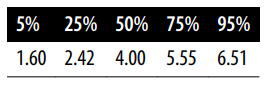

- `percentages = [0.05, 0.25, 0.5, 0.75, 0.95]`: Se define una lista llamada `percentages` que contiene los percentiles específicos que se desean calcular (5%, 25%, 50%, 75%, 95%).

- `state["Murder.Rate"].quantile(percentages)`: Calcula los percentiles especificados para la columna "Murder.Rate" en el DataFrame `state`.

- `pd.DataFrame(...)`: Convierte el resultado en un DataFrame de Pandas.

- `df.index = [f"{p * 100}%" for p in percentages]`: Establece los índices del DataFrame como cadenas formateadas que representan los percentiles en formato de porcentaje (por ejemplo, "5%", "25%", "50%", "75%", "95%").

- `print(df.transpose())`: Imprime el DataFrame transpuesto (cambiando filas por columnas) para que los percentiles estén en columnas y sea más legible.

En resumen, estas líneas de código crean un DataFrame que contiene los percentiles específicos de la columna "Murder.Rate" y lo imprime en un formato tabular con los percentiles en las columnas y sus valores correspondientes en las filas. Esto proporciona una manera rápida de visualizar estadísticas resumidas para la tasa de homicidios.

La mediana es de 4 homicidios por cada 100,000 personas, aunque hay bastante variabilidad: el percentil 5 es solo 1.6 y el percentil 95 es 6.51.

Los boxplots (diagrama de caja), introducidos por Tukey [Tukey-1977], se basan en percentiles y ofrecen una forma rápida de visualizar la distribución de los datos. La Figura 1-2 muestra un boxplot de la población por estado producido por R:

    boxplot(state[['Population']]/1000000, ylab='Population (millions)')

pandas proporciona varios gráficos exploratorios básicos para marcos de datos; uno de ellos son los boxplots (diagrama de caja):

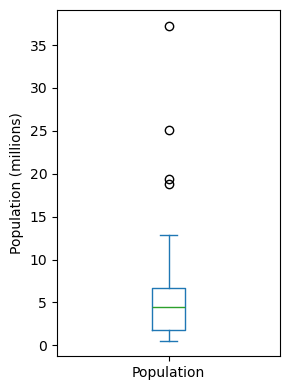

In [64]:
# Creamos un gráfico de caja (boxplot) de la columna 'Population' en el DataFrame 'state'.
# Dividimos la población por un millón para representarla en millones en lugar de unidades completas.
# Configuramos la etiqueta del eje y como "Population (millions)" para reflejar la escala ajustada.
# Ajustamos el diseño del gráfico y lo mostramos.

ax = (state["Population"] / 1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel("Population (millions)")

plt.tight_layout()
plt.show()

**Figura 1-2**. Boxplot de las poblaciones estatales

- `state["Population"]/1_000_000`: Esto está dividiendo cada valor en la columna "Population" por 1,000,000 para convertir los valores a millones. Esto se hace para ajustar la escala y hacer más legible el gráfico de caja.

- `.plot.box()`: Este método se utiliza para crear un diagrama de caja (box plot) de los datos.

- `ax = ...`: Esto asigna el objeto de ejes del gráfico a la variable `ax`. Esto permite realizar ajustes adicionales en el gráfico si es necesario.

- `ax.set_ylabel("Population (millions)")`: Esto establece la etiqueta del eje y del gráfico, indicando que los valores en el eje y representan la población en millones.

- `plt.tight_layout()`: Ajusta automáticamente los parámetros del diseño para que los elementos del gráfico no se superpongan.

- `plt.show()`: Muestra el gráfico.

En resumen, este código crea y muestra un diagrama de caja de la columna "Population" ajustada a millones, etiquetando el eje y con "Population (millions)". Esto proporciona una visualización compacta de la distribución y estadísticas resumidas de la población en millones para los diferentes estados.

A partir de este boxplot (diagrama de caja), podemos ver de inmediato que la mediana de la población estatal es de aproximadamente 5 millones, la mitad de los estados se encuentran entre aproximadamente 2 millones y aproximadamente 7 millones, y hay algunos valores atípicos con poblaciones elevadas. El extremo superior e inferior del rectángulo son los percentiles 75 y 25, respectivamente. La mediana se muestra con la línea horizontal en el rectángulo. Las líneas punteadas, conocidas como "whiskers" (bigotes), se extienden desde la parte superior e inferior del rectángulo para indicar el rango de la mayoría de los datos. Existen muchas variaciones de un boxplot; consulta, por ejemplo, la documentación de la función boxplot de R [R-base-2015]. De forma predeterminada, la función de R extiende los bigotes hasta el punto más alejado más allá del rectángulo, excepto que no irá más allá de 1.5 veces el IQR. Matplotlib utiliza la misma implementación; otro software puede utilizar una regla diferente.

Cualquier dato fuera de los bigotes se representa como puntos individuales o círculos (a menudo considerados valores atípicos).

# Tablas de Frecuencia e Histogramas

*Una tabla de frecuencia de una variable divide el rango de la variable en segmentos igualmente espaciados y nos dice cuántos valores caen dentro de cada segmento*. La Tabla 1-5 muestra una tabla de frecuencia de la población por estado calculada en R:

    breaks <- seq(from=min(state[['Population']]),
     to=max(state[['Population']]), length=11)
    pop_freq <- cut(state[['Population']], breaks=breaks,
     right=TRUE, include.lowest=TRUE)
    table(pop_freq)

La función `pandas.cut` crea una serie que asigna los valores a los segmentos. Utilizando el método `value_counts`, obtenemos la tabla de frecuencias:

In [65]:
# Creamos intervalos (bins) para la columna 'Population' en el DataFrame 'state' utilizando 10 bins.
# La función cut de Pandas asigna cada valor de la columna a uno de estos bins.
binnedPopulation = pd.cut(state["Population"], 10)

# Contamos la frecuencia de ocurrencia de cada bin y mostramos los resultados.
print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


- `state["Population"]`: Esto es la columna "Population" del DataFrame o Serie llamado `state`. Representa la población de los diferentes estados.

- `pd.cut(state["Population"], 10)`: Este es un método de Pandas que se utiliza para dividir los valores en la columna "Population" en 10 intervalos (bins). Cada valor se asigna a un bin específico.

- `binnedPopulation`: Esto crea una nueva Serie que contiene las etiquetas de los bins a los que pertenece cada valor de la población.

- `binnedPopulation.value_counts()`: Este método cuenta la frecuencia de cada bin en la Serie `binnedPopulation`. Devuelve una serie que muestra cuántos valores caen en cada bin.

En resumen, este código crea intervalos (bins) para la población de los estados, asigna cada valor de la población a uno de esos bins y luego cuenta cuántos estados están en cada bin. Esto proporciona una idea de cómo se distribuye la población en diferentes rangos.

In [66]:
# Asignamos un nombre a la Serie de intervalos (bins) creada mediante pd.cut.
binnedPopulation.name = 'binnedPopulation'

# Concatenamos la Serie de intervalos al DataFrame 'state' a lo largo del eje de las columnas.
df = pd.concat([state, binnedPopulation], axis=1)

# Ordenamos el DataFrame 'df' por la columna 'Population'.
df = df.sort_values(by='Population')

# Inicializamos una lista para almacenar la información de cada grupo.
groups = []

# Iteramos sobre los grupos creados por la función groupby y creamos un diccionario para cada grupo.
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })

# Imprimimos un DataFrame con la información de los grupos.
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

C:\Users\HP\AppData\Local\Temp\ipykernel_23864\354409502.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in df.groupby(by='binnedPopulation'):


**Tabla 1-5**. Una tabla de frecuencias de la población por estado.

- `binnedPopulation.name = 'binnedPopulation'`: Asigna el nombre 'binnedPopulation' a la Serie que contiene las etiquetas de los bins para la población.

- `pd.concat([state, binnedPopulation], axis=1)`: Concatena el DataFrame original `state` con la Serie `binnedPopulation` a lo largo del eje de las columnas (axis=1). Esto agrega la información de los bins de población al DataFrame original.

- `df = df.sort_values(by='Population')`: Ordena el DataFrame resultante por la columna 'Population', lo que significa que las filas del DataFrame se ordenarán en función de los valores de la población.

En resumen, estas líneas de código están añadiendo la información de los bins de población al DataFrame original y ordenando el DataFrame resultante por la columna de población. Esto podría ser útil para analizar y visualizar la distribución de la población en relación con los bins específicos.

- `groups = []`: Inicializa una lista llamada `groups` para almacenar la información resumida de cada grupo.

- `for group, subset in df.groupby(by='binnedPopulation'):`: Utiliza el método `groupby` para dividir el DataFrame en grupos basados en la columna 'binnedPopulation'. `group` es la etiqueta del bin y `subset` es el subconjunto de datos correspondiente a ese bin.

- `groups.append({...})`: Para cada grupo, agrega un diccionario al cual se le asigna la etiqueta del bin (`'BinRange'`), la cantidad de estados en ese bin (`'Count'`), y las abreviaturas de los estados en ese bin como una cadena separada por comas (`'States'`). Este diccionario se añade a la lista `groups`.

- `print(pd.DataFrame(groups))`: Imprime un DataFrame a partir de la lista `groups`. Este DataFrame proporciona un resumen de la distribución de estados en cada bin de población, mostrando el rango del bin, la cantidad de estados en el bin y las abreviaturas de los estados en ese bin.

En resumen, estas líneas de código generan y muestran un resumen de la distribución de estados en cada bin de población en forma tabular.

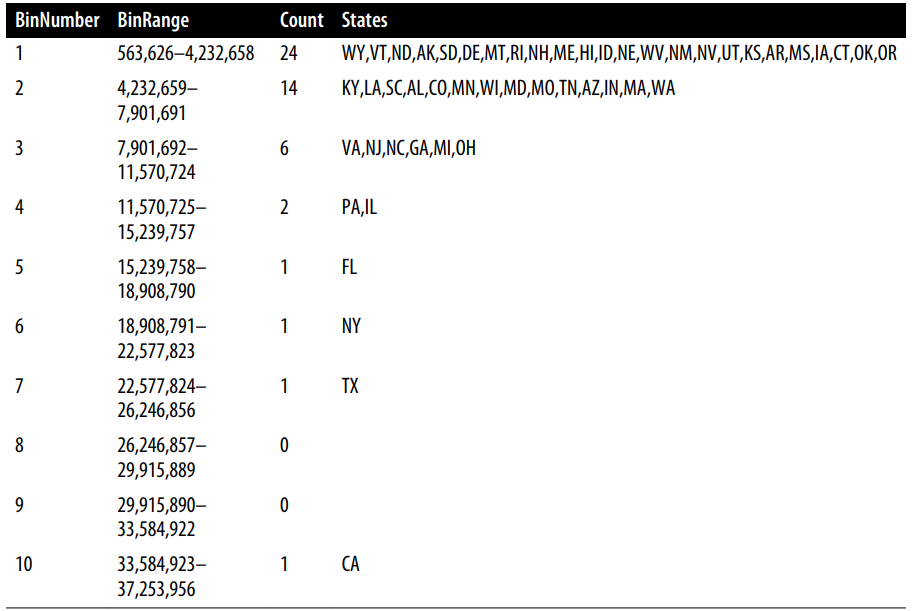

El estado menos poblado es Wyoming, con 563,626 personas, y el más poblado es California, con 37,253,956 personas. Esto nos da un rango de 37,253,956 - 563,626 = 36,690,330, que debemos dividir en bins de tamaño igual, digamos 10 bins. Con 10 bins de tamaño igual, cada bin tendrá un ancho de 3,669,033, por lo que el primer bin abarcará desde 563,626 hasta 4,232,658. En cambio, el bin superior, de 33,584,923 a 37,253,956, tiene solo un estado: California. Los dos bins inmediatamente por debajo de California están vacíos, hasta que llegamos a Texas. Es importante incluir los bins vacíos; el hecho de que no haya valores en esos bins es información útil. También puede ser útil experimentar con diferentes tamaños de bins. Si son demasiado grandes, las características importantes de la distribución pueden quedar oscurecidas. Si son demasiado pequeños, el resultado es demasiado detallado y se pierde la capacidad de ver el panorama general.

**Nota:**

Tanto las tablas de frecuencia como los percentiles resumen los datos creando intervalos. En general, los cuartiles y deciles tendrán el mismo conteo en cada intervalo (intervalos de igual conteo), pero los tamaños de los intervalos serán diferentes. La tabla de frecuencia, por otro lado, tendrá conteos diferentes en los intervalos (intervalos de igual tamaño), y los tamaños de los intervalos serán los mismos.

Un $histograma$ *es una forma de visualizar una tabla de frecuencias, con intervalos en el eje x y el conteo de datos en el eje y*. En la Figura 1-3, por ejemplo, el intervalo centrado en 10 millones (1e+07) se extiende aproximadamente desde 8 millones hasta 12 millones, y hay seis estados en ese intervalo. Para crear un histograma correspondiente a la Tabla 1-5 en R, utiliza la función `hist` con el argumento `breaks`:

    hist(state[['Population']], breaks=breaks)

pandas soporta histogramas para marcos de datos con el método `DataFrame.plot.hist`. Utiliza el argumento de palabra clave `bins` para definir el número de intervalos. Los diversos métodos de trazado devuelven un objeto de eje que permite un ajuste adicional de la visualización utilizando Matplotlib:

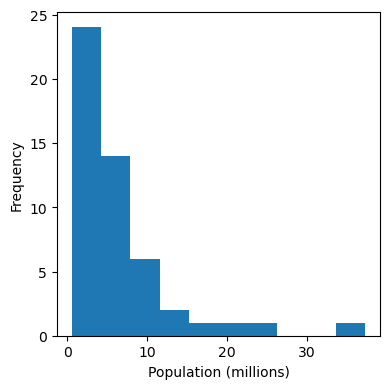

In [67]:
# Creamos un histograma de la columna 'Population' en el DataFrame 'state'.
# Dividimos la población por un millón para representarla en millones en lugar de unidades completas.
# Configuramos la etiqueta del eje x como "Population (millions)" para reflejar la escala ajustada.
# Ajustamos el diseño del gráfico y lo mostramos.
ax = (state["Population"] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel("Population (millions)")

plt.tight_layout()
plt.show()

**Figura 1-3**. Histograma de las poblaciones estatales

- `state["Population"] / 1_000_000`: Esto está dividiendo cada valor en la columna "Population" por 1,000,000 para convertir los valores a millones. Esto se hace para ajustar la escala y hacer más legible el histograma.

- `.plot.hist(figsize=(4, 4))`: Este método se utiliza para crear un histograma de los datos. El parámetro `figsize` establece el tamaño de la figura.

- `ax.set_xlabel("Population (millions)")`: Esto establece la etiqueta del eje x del gráfico, indicando que los valores en el eje x representan la población en millones.

- `plt.tight_layout()`: Ajusta automáticamente los parámetros del diseño para que los elementos del gráfico no se superpongan.

- `plt.show()`: Muestra el histograma.

En resumen, este código crea y muestra un histograma de la columna "Population" ajustada a millones, etiquetando el eje x con "Population (millions)". Esto proporciona una visualización de la distribución de la población en millones para los diferentes estados.

El histograma se muestra en la Figura 1-3. En general, los histogramas se representan de tal manera que:
- Los intervalos vacíos se incluyen en el gráfico.
- Los intervalos son de ancho igual.
- El número de intervalos (o, equivalentemente, el tamaño del intervalo) es determinado por el usuario.
- Las barras son contiguas, es decir, no hay espacio vacío entre las barras a menos que haya un intervalo vacío.

#### Momentos Estadísticos

En teoría estadística, la ubicación y la variabilidad se conocen como el primer y segundo momentos de una distribución. El tercer y cuarto momento se llaman asimetría (skewness) y curtosis (kurtosis). La $asimetría$ *se refiere a si los datos están sesgados hacia valores más grandes o más pequeños*, y la $curtosis$ *indica la propensión de los datos a tener valores extremos*. Generalmente, no se utilizan métricas para medir la asimetría y la curtosis; en su lugar, se descubren a través de visualizaciones como las Figuras 1-2 y 1-3.

# Gráficos de Densidad y Estimaciones

Relacionado con el histograma está el gráfico de densidad, que muestra la distribución de los valores de los datos como una línea continua. Un gráfico de densidad se puede considerar como un histograma suavizado, aunque típicamente se calcula directamente a partir de los datos mediante una estimación de densidad de kernel (ver [Duong-2001] para un breve tutorial). La Figura 1-4 muestra una estimación de densidad superpuesta en un histograma. En R, puedes calcular una estimación de densidad usando la función `density`:

    hist(state[['Murder.Rate']], freq=FALSE)
    lines(density(state[['Murder.Rate']]), lwd=3, col='blue')


pandas proporciona el método `density` para crear un gráfico de densidad. Utiliza el argumento `bw_method` para controlar la suavidad de la curva de densidad:

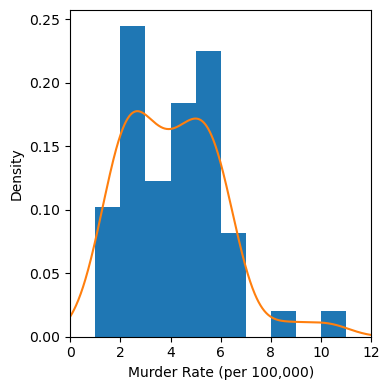

In [68]:
# Creamos un histograma de la columna 'Murder.Rate' en el DataFrame 'state'.
# Configuramos la densidad a True para obtener una distribución de probabilidad estimada.
# Establecemos los límites del eje x entre 0 y 12 y definimos bins específicos.
# También configuramos el tamaño del gráfico.
ax = state["Murder.Rate"].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12), figsize=(4, 4))

# Agregamos una gráfica de densidad sobre el histograma para proporcionar una visualización más suave de la distribución.
state["Murder.Rate"].plot.density(ax=ax)

# Configuramos la etiqueta del eje x como "Murder Rate (per 100,000)" para reflejar la escala y la unidad.
# Ajustamos el diseño del gráfico y lo mostramos.
ax.set_xlabel("Murder Rate (per 100,000)")

plt.tight_layout()
plt.show()

**Figura 1-4**. Densidad de las tasas de homicidios estatales

- `state["Murder.Rate"].plot.hist(...)`: Este método crea un histograma de la columna "Murder.Rate". Los parámetros `density=True` normalizan el histograma para que la suma total de las áreas sea igual a 1. `xlim=[0, 12]` establece los límites del eje x. `bins=range(1, 12)` especifica los bins del histograma.

- `state["Murder.Rate"].plot.density(ax=ax)`: Este método superpone una gráfica de densidad sobre el histograma existente. La densidad proporciona una estimación suave de la distribución de los datos.

- `ax.set_xlabel("Murder Rate (per 100,000)")`: Esto establece la etiqueta del eje x del gráfico, indicando que los valores en el eje x representan la tasa de homicidios por 100,000 habitantes.

- `plt.tight_layout()`: Ajusta automáticamente los parámetros del diseño para que los elementos del gráfico no se superpongan.

- `plt.show()`: Muestra el gráfico.

En resumen, este código crea y muestra un histograma y una gráfica de densidad de la columna "Murder.Rate", proporcionando una visualización de la distribución de tasas de homicidios para los diferentes estados.

Las funciones de trazado a menudo toman un argumento opcional de eje (`ax`), lo que provocará que el gráfico se añada al mismo gráfico.
Una distinción clave respecto al histograma trazado en la Figura 1-3 es la escala del eje y: un gráfico de densidad corresponde a trazar el histograma como una proporción en lugar de recuentos (esto se especifica en R utilizando el argumento `freq=FALSE`). Ten en cuenta que el área total bajo la curva de densidad es igual a 1, y en lugar de contar en intervalos, calculas áreas bajo la curva entre dos puntos en el eje x, lo que corresponde a la proporción de la distribución que se encuentra entre esos dos puntos.

# Estimación de densidad
La estimación de densidad es un tema amplio con una larga historia en la literatura estadística. De hecho, se han publicado más de 20 paquetes de R que ofrecen funciones para la estimación de densidad. [Deng-Wickham-2011] proporciona una revisión exhaustiva de los paquetes de R, con una recomendación particular para ASH o KernSmooth. Los métodos de estimación de densidad en pandas y scikit-learn también ofrecen implementaciones sólidas. Para muchos problemas de ciencia de datos, no es necesario preocuparse por los diferentes tipos de estimaciones de densidad; es suficiente utilizar las funciones básicas.

#### Ideas clave

* Un histograma de frecuencia representa las frecuencias en el eje y y los valores de la variable en el eje x; proporciona una visión rápida de la distribución de los datos.
* Una tabla de frecuencias es una versión tabular de las frecuencias encontradas en un histograma.
* Un diagrama de caja, con la parte superior e inferior de la caja en los percentiles 75 y 25, respectivamente, también brinda una rápida impresión de la distribución de los datos; a menudo se utiliza en visualizaciones comparativas lado a lado para comparar distribuciones.
* Un gráfico de densidad es una versión suavizada de un histograma; requiere una función para estimar un gráfico basado en los datos (por supuesto, son posibles múltiples estimaciones).

#### Lecturas adicionales

* Un profesor de la SUNY Oswego proporciona una guía paso a paso para crear un diagrama de caja.
* La estimación de densidad en R se cubre en el artículo de Henry Deng y Hadley Wickham del mismo nombre.
* R-Bloggers tiene una publicación útil sobre histogramas en R, que incluye elementos de personalización, como el particionamiento (bins).
* R-Bloggers también tiene una publicación similar sobre diagramas de caja en R.
* Matthew Conlen publicó una presentación interactiva que demuestra el efecto de elegir diferentes núcleos y anchos de banda en las estimaciones de densidad de núcleo.

# Explorando datos binarios y categóricos

Para datos categóricos, las proporciones o porcentajes simples cuentan la historia de los datos.

#### Términos clave para explorar datos categóricos

##### Moda
La categoría o valor que ocurre con mayor frecuencia en un conjunto de datos.

##### Valor esperado
Cuando las categorías pueden asociarse con un valor numérico, esto proporciona un valor promedio basado en la probabilidad de ocurrencia de una categoría.

##### Gráficos de barras
La frecuencia o proporción para cada categoría representada como barras.

##### Gráficos circulares (o de pastel)
La frecuencia o proporción para cada categoría representada como sectores en un pastel.

Obtener un resumen de una variable binaria o una variable categórica con pocas categorías es bastante fácil: simplemente determinamos la proporción de unos, o las proporciones de las categorías importantes. Por ejemplo, la Tabla 1-6 muestra el porcentaje de vuelos demorados por la causa de la demora en el Aeropuerto de Dallas/Fort Worth desde 2010. Las demoras se categorizan como debidas a factores bajo control de la aerolínea, demoras en el sistema de control de tráfico aéreo (ATC), condiciones meteorológicas, seguridad o un retraso en la llegada de la aeronave.

In [69]:
# Leemos un archivo CSV ('dfw_airline.csv') y almacenamos los datos en un DataFrame llamado 'dfw'.
dfw = pd.read_csv("data/dfw_airline.csv")

# Calculamos el porcentaje de cada valor en el DataFrame 'dfw' en relación con la suma total de todos los valores.
# La operación dfw / dfw.values.sum() realiza la división elemento por elemento.
# Multiplicamos el resultado por 100 para obtener los porcentajes.
percentage_dfw = 100 * dfw / dfw.values.sum()

# Imprimimos el DataFrame resultante con los porcentajes.
print(percentage_dfw)

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


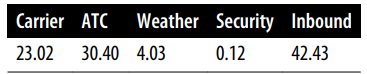

**Tabla 1-6**. Porcentaje de retrasos por causa en el Aeropuerto de Dallas/Fort Worth.

Las gráficas de barras, frecuentemente vistas en la prensa popular, son una herramienta visual común para mostrar una única variable categórica. Las categorías se enumeran en el eje x, y las frecuencias o proporciones en el eje y. La Figura 1-5 muestra los retrasos en el aeropuerto por año según la causa para Dallas/Fort Worth (DFW), y se genera con la función barplot de R:

    barplot(as.matrix(dfw) / 6, cex.axis=0.8, cex.names=0.7,
     xlab='Cause of delay', ylab='Count')

pandas también admite barplot (gráficos de barras para marcos de datos) (data frames):

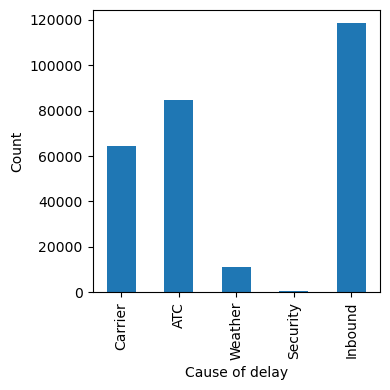

In [70]:
# Transponemos el DataFrame 'dfw' para intercambiar filas y columnas, facilitando la visualización de barras.
# Creamos un gráfico de barras a partir de los datos transpuestos.
# Configuramos el tamaño del gráfico y desactivamos la leyenda.
ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)

# Configuramos las etiquetas de los ejes x e y para reflejar la información del gráfico.
ax.set_xlabel("Cause of delay")
ax.set_ylabel("Count")

# Ajustamos el diseño del gráfico y lo mostramos.
plt.tight_layout()
plt.show()

**Figura 1-5**. Gráfico de barras de retrasos de aerolíneas en DFW por causa

1. `ax = dfw.transpose().plot.bar(figsize=(4, 4), legend=False)`: 
   - `dfw.transpose()`: Transpone el DataFrame `dfw`. La transposición intercambia las filas por columnas y viceversa. Esto es útil si los datos en `dfw` están organizados de manera que las filas representan categorías y las columnas representan observaciones.
   - `.plot.bar(figsize=(4, 4), legend=False)`: Crea un gráfico de barras a partir del DataFrame transpuesto. `figsize=(4, 4)` establece el tamaño del gráfico en pulgadas. `legend=False` evita que se muestre la leyenda en el gráfico.
   - `ax = ...`: Asigna el objeto de ejes devuelto por `plot.bar` a la variable `ax`. Esto permite realizar ajustes adicionales en el gráfico utilizando este objeto de ejes.

2. `ax.set_xlabel("Cause of delay")`: Establece la etiqueta del eje x del gráfico como "Cause of delay". Es decir, la etiqueta que describirá la variable representada en el eje x.

3. `ax.set_ylabel("Count")`: Establece la etiqueta del eje y del gráfico como "Count". Es decir, la etiqueta que describirá la variable representada en el eje y.

4. `plt.tight_layout()`: Ajusta automáticamente el diseño del gráfico para evitar superposiciones y mejorar la apariencia general. Esto es útil cuando se tienen múltiples subgráficos o etiquetas largas que podrían solaparse.

5. `plt.show()`: Muestra el gráfico. Es importante llamar a esta función al final para que el gráfico sea visualizado.

En resumen, este código crea un gráfico de barras a partir de un DataFrame de pandas transpuesto, configura las etiquetas de los ejes x e y, ajusta el diseño y finalmente muestra el gráfico. La información específica sobre los datos en `dfw` y el contexto en el que se utiliza este código puede proporcionar una comprensión más completa de su propósito.

Ten en cuenta que un gráfico de barras se asemeja a un histograma; en un gráfico de barras, el eje x representa diferentes categorías de una variable de tipo factorial, mientras que en un histograma el eje x representa valores de una sola variable en una escala numérica. En un histograma, las barras suelen mostrarse tocándose entre sí, con espacios que indican valores que no ocurrieron en los datos. En un gráfico de barras, las barras se muestran separadas entre sí.

Los gráficos circulares son una alternativa a los gráficos de barras, aunque los estadísticos y expertos en visualización de datos generalmente evitan los gráficos circulares por ser menos informativos visualmente (ver [Few-2007]).

#### Datos Numéricos como Datos Categóricos

En "Tablas de Frecuencia e Histogramas" en la página 22, examinamos
tablas de frecuencia basadas en la agrupación de datos. Esto convierte
implícitamente los datos numéricos en un factor ordenado. En este sentido, los histogramas y
los gráficos de barras son similares, excepto que las categorías en el eje x del
gráfico de barras no están ordenadas. Convertir datos numéricos en datos categóricos
es un paso importante y ampliamente utilizado en el análisis de datos, ya que
reduce la complejidad (y tamaño) de los datos. Esto ayuda en la identificación de relaciones entre características, especialmente en las etapas iniciales de un análisis.

# Moda

La moda es el valor, o los valores en caso de empate, que aparece con mayor frecuencia en los datos. Por ejemplo, la moda de la causa de retraso en el aeropuerto de Dallas/Fort Worth es "Entrante". Como otro ejemplo, en la mayoría de las partes de los Estados Unidos, la moda para la preferencia religiosa sería el cristianismo. La moda es una estadística descriptiva simple para datos categóricos y generalmente no se utiliza para datos numéricos.

# Valor Esperado

Un tipo especial de datos categóricos es aquel en el cual las categorías representan o pueden ser mapeadas a valores discretos en la misma escala. Por ejemplo, un comercializador de una nueva tecnología en la nube ofrece dos niveles de servicio, uno con un precio de $300\ al\ mes\ y\ otro\ de\ $50 al mes. El comercializador ofrece seminarios web gratuitos para generar clientes potenciales, y la empresa estima que el 5% de los asistentes se suscribirá al servicio de 300, el 15% se suscribirá al servicio de $50 y el 80% no se suscribirá a nada. Estos datos se pueden resumir, con fines financieros, en un único "valor esperado", que es una forma de media ponderada, donde los pesos son probabilidades.

El valor esperado se calcula de la siguiente manera:
1. Multiplica cada resultado por su probabilidad de ocurrencia.
2. Suma estos valores.

En el ejemplo del servicio en la nube, el valor esperado de un asistente al seminario web es de $22.50 por mes, calculado de la siguiente manera:

$$VE = 0.05 * 300 + 0.15 * 50 + 0.80 * 0 = 22.5$$

El valor esperado es realmente una forma de media ponderada: combina las ideas de expectativas futuras y pesos de probabilidad, a menudo basados en juicios subjetivos. El valor esperado es un concepto fundamental en la valoración empresarial y la planificación de inversiones, por ejemplo, el valor esperado de cinco años de ganancias de una nueva adquisición o los ahorros esperados de costos de nuevo software de gestión de pacientes en una clínica.

# Probabilidad
Hemos mencionado anteriormente la probabilidad de que ocurra un valor. La mayoría de las personas tienen una comprensión intuitiva de la probabilidad, encontrando el concepto con frecuencia en pronósticos del tiempo (la posibilidad de lluvia) o análisis deportivos (la probabilidad de ganar). Los deportes y los juegos se expresan más a menudo como cuotas, que se pueden convertir fácilmente a probabilidades (si las cuotas de que un equipo ganará son 2 a 1, su probabilidad de ganar es 2/(2+1) = 2/3). Sorprendentemente, el concepto de probabilidad puede ser objeto de una profunda discusión filosófica cuando se trata de definirlo. Afortunadamente, no necesitamos una definición matemática o filosófica formal aquí. Para nuestros propósitos, la probabilidad de que ocurra un evento es la proporción de veces que ocurriría si la situación pudiera repetirse una y otra vez, incontables veces. En su mayoría, esto es una construcción imaginaria, pero es una comprensión operativa adecuada de la probabilidad.

#### Ideas Clave

* Los datos categóricos suelen resumirse en proporciones y pueden visualizarse en un gráfico de barras.
* Las categorías pueden representar cosas distintas (manzanas y naranjas, masculino y femenino), niveles de una variable de tipo factorial (bajo, medio y alto) o datos numéricos que se han agrupado.
* El valor esperado es la suma de los valores multiplicados por su probabilidad de ocurrencia, a menudo utilizado para resumir los niveles de variables de tipo factorial.

#### Lecturas Adicionales

Ningún curso de estadísticas está completo sin una lección sobre gráficos engañosos, que a menudo involucra gráficos de barras y gráficos circulares.

# Correlación

El análisis exploratorio de datos en muchos proyectos de modelado (ya sea en ciencia de datos o en investigación) implica examinar la correlación entre predictores y entre predictores y una variable objetivo. Se dice que las variables X e Y (cada una con datos medidos) están positivamente correlacionadas si los valores altos de X van de la mano con valores altos de Y, y los valores bajos de X van con valores bajos de Y. Si los valores altos de X van con valores bajos de Y, y viceversa, las variables están negativamente correlacionadas.

### Términos Clave para Correlación

##### Coeficiente de correlación
Una métrica que mide en qué medida las variables numéricas están asociadas entre sí (varía de -1 a +1).

##### Matriz de correlación
Una tabla en la que las variables se muestran en filas y columnas, y los valores de las celdas son las correlaciones entre las variables.

##### Diagrama de dispersión
Un gráfico en el que el eje x es el valor de una variable y el eje y es el valor de otra.

Consideremos estas dos variables, perfectamente correlacionadas en el sentido de que cada una va de bajo a alto:

$$v1: {1, 2, 3}$$
$$v2: {4, 5, 6}$$

La suma de productos de vectores es 1 · 4 + 2 · 5 + 3 · 6 = 32. Ahora intenta reorganizar uno de ellos y recalcular; la suma de productos de vectores nunca será mayor que 32. Entonces, esta suma de productos podría usarse como una métrica; es decir, la suma observada de 32 podría compararse con muchas reorganizaciones aleatorias (de hecho, esta idea se relaciona con una estimación basada en el re-muestreo; consulta "Prueba de Permutación" en la página 97). Sin embargo, los valores producidos por esta métrica no son muy significativos, excepto en relación con la distribución de re-muestreo.
Más útil es una variante estandarizada: el coeficiente de correlación, que proporciona una estimación de la correlación entre dos variables que siempre se encuentra en la misma escala. Para calcular el coeficiente de correlación de Pearson, multiplicamos las desviaciones de la media para la variable 1 por las de la variable 2 y dividimos por el producto de las desviaciones estándar:

$$ r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{(n - 1)s_x s_y} $$

Observa que dividimos por $n - 1$ en lugar de $n$; consulta "Grados de Libertad, ¿$n$ o $n - 1$ en la página 15 para más detalles. El coeficiente de correlación siempre se encuentra entre +1 (correlación positiva perfecta) y -1 (correlación negativa perfecta); 0 indica ninguna correlación.
Las variables pueden tener una asociación que no sea lineal, en cuyo caso el coeficiente de correlación puede no ser una métrica útil. La relación entre las tasas impositivas y los ingresos recaudados es un ejemplo: a medida que las tasas impositivas aumentan desde cero, los ingresos recaudados también aumentan. Sin embargo, una vez que las tasas impositivas alcanzan un nivel alto y se acercan al 100%, la evasión fiscal aumenta y los ingresos fiscales realmente disminuyen.
La Tabla 1-7, llamada matriz de correlación, muestra la correlación entre los rendimientos diarios de las acciones de telecomunicaciones desde julio de 2012 hasta junio de 2015. Desde la tabla, se puede ver que Verizon (VZ) y ATT (T) tienen la correlación más alta. Level 3 (LVLT), que es una empresa de infraestructura, tiene la correlación más baja con las demás. Observa la diagonal de 1s (la correlación de una acción consigo misma es 1) y la redundancia de la información por encima y por debajo de la diagonal.

#### Primero lea los conjuntos de datos requeridos.

In [71]:
# Leemos los datos de símbolos de los sectores del índice S&P 500 desde el archivo CSV 'sp500_sectors.csv'.
sp500_sym = pd.read_csv("data/sp500_sectors.csv")

# Leemos los datos de precios del índice S&P 500 desde el archivo CSV 'sp500_data.csv'.
# Configuramos la primera columna como índice.
sp500_px = pd.read_csv("data/sp500_data.csv", index_col=0)

#### Determinar símbolos de telecomunicaciones

In [72]:
# Filtramos el DataFrame 'sp500_sym' para obtener los símbolos de las empresas en el sector de servicios de telecomunicaciones.
# Creamos una Serie llamada 'telecomSymbols' que contiene los símbolos correspondientes.

telecomSymbols = sp500_sym[sp500_sym["sector"] == "telecommunications_services"]["symbol"]

#### Filtrar datos para las fechas de julio de 2012 a junio de 2015

In [73]:
# Filtramos el DataFrame 'sp500_px' para seleccionar los datos de precios del sector de servicios de telecomunicaciones.
# Consideramos solo las fechas a partir del 1 de julio de 2012.
telecom = sp500_px.loc[sp500_px.index >= '2012-07-01', telecomSymbols]

# Calculamos la matriz de correlación para los precios de las empresas en el sector de telecomunicaciones.
correlation_matrix = telecom.corr()

# Imprimimos la matriz de correlación y los datos de precios del sector de telecomunicaciones.
print(telecom)

                   T       CTL       FTR        VZ      LVLT
2012-07-02  0.422496  0.140847  0.070879  0.554180 -0.519998
2012-07-03 -0.177448  0.066280  0.070879 -0.025976 -0.049999
2012-07-05 -0.160548 -0.132563  0.055128 -0.051956 -0.180000
2012-07-06  0.342205  0.132563  0.007875  0.140106 -0.359999
2012-07-09  0.136883  0.124279 -0.023626  0.253943  0.180000
...              ...       ...       ...       ...       ...
2015-06-25  0.049342 -1.600000 -0.040000 -0.187790 -0.330002
2015-06-26 -0.256586  0.039999 -0.070000  0.029650 -0.739998
2015-06-29 -0.098685 -0.559999 -0.060000 -0.504063 -1.360000
2015-06-30 -0.503298 -0.420000 -0.070000 -0.523829  0.199997
2015-07-01 -0.019737  0.080000 -0.050000  0.355811  0.139999

[754 rows x 5 columns]


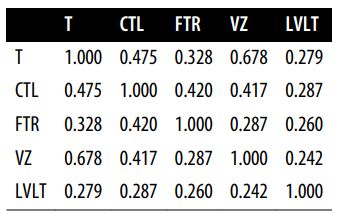

**Tabla 1-7**. Correlación entre los rendimientos de acciones de telecomunicaciones

A continuación nos centramos en los fondos negociados en las principales bolsas (sector == 'etf').

In [74]:
# Filtramos el DataFrame 'sp500_px' para seleccionar los datos de precios de los ETFs (Fondos Negociados en Bolsa).
# Consideramos solo las fechas a partir del 1 de julio de 2012.
# Los símbolos de los ETFs se obtienen del DataFrame 'sp500_sym' filtrando las empresas en el sector "etf".
etfs = sp500_px.loc[sp500_px.index > "2012-07-01", sp500_sym[sp500_sym["sector"] == "etf"]["symbol"]]

# Imprimimos las primeras filas del DataFrame 'etfs'.
print(etfs.head())

                 XLI       QQQ       SPY       DIA       GLD    VXX       USO  \
2012-07-02 -0.376098  0.096313  0.028223 -0.242796  0.419998 -10.40  0.000000   
2012-07-03  0.376099  0.481576  0.874936  0.728405  0.490006  -3.52  0.250000   
2012-07-05  0.150440  0.096313 -0.103487  0.149420  0.239991   6.56 -0.070000   
2012-07-06 -0.141040 -0.491201  0.018819 -0.205449 -0.519989  -8.80 -0.180000   
2012-07-09  0.244465 -0.048160 -0.056445 -0.168094  0.429992  -0.48  0.459999   

                 IWM       XLE       XLY       XLU       XLB       XTL  \
2012-07-02  0.534641  0.028186  0.095759  0.098311 -0.093713  0.019076   
2012-07-03  0.926067  0.995942  0.000000 -0.044686  0.337373  0.000000   
2012-07-05 -0.171848 -0.460387  0.306431 -0.151938  0.103086  0.019072   
2012-07-06 -0.229128  0.206706  0.153214  0.080437  0.018744 -0.429213   
2012-07-09 -0.190939 -0.234892 -0.201098 -0.035751 -0.168687  0.000000   

                 XLV       XLP       XLF       XLK  
2012-07-02 -0.0

Una tabla de correlaciones como la Tabla 1-7 comúnmente se representa gráficamente para mostrar visualmente la relación entre múltiples variables. La Figura 1-6 muestra la correlación entre los rendimientos diarios de los fondos cotizados en bolsa (ETFs) más importantes. En R, podemos crear esto fácilmente utilizando el paquete corrplot:

    etfs <- sp500_px[row.names(sp500_px) > '2012-07-01',
     sp500_sym[sp500_sym$sector == 'etf', 'symbol']]
    library(corrplot)
    corrplot(cor(etfs), method='ellipse')

Es posible crear el mismo gráfico en Python, pero no hay una implementación en los paquetes comunes. Sin embargo, la mayoría admite la visualización de matrices de correlación mediante mapas de calor. El siguiente código demuestra esto utilizando el paquete seaborn.heatmap. En el repositorio de código fuente adjunto, incluimos código en Python para generar la visualización más completa:

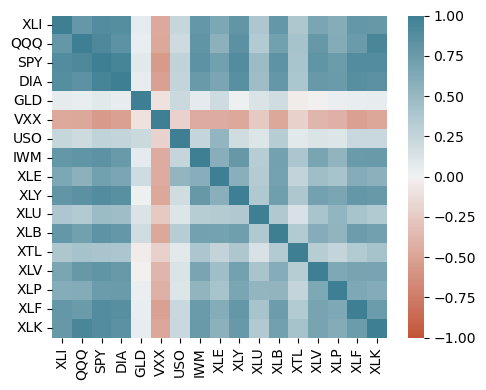

In [75]:
# Creamos una figura y ejes para el gráfico de mapa de calor con un tamaño específico.
fig, ax = plt.subplots(figsize=(5, 4))

# Utilizamos Seaborn para crear un mapa de calor de la matriz de correlación de los precios de los ETFs.
# Configuramos los valores mínimos y máximos para la escala de colores y elegimos un mapa de colores divergente.
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)

# Ajustamos el diseño del gráfico y lo mostramos.
plt.tight_layout()
plt.show()

**Figura 1-6**. Correlación entre los rendimientos de los ETF


```python
# Creamos una figura y ejes para el gráfico de mapa de calor con un tamaño específico.
fig, ax = plt.subplots(figsize=(5, 4))
```

En esta línea, estás utilizando la función `plt.subplots` para crear una figura (`fig`) y ejes (`ax`) para el gráfico. La figura es el lienzo general donde se colocarán los subgráficos, y los ejes son el área específica donde se dibujará el gráfico de mapa de calor. `figsize=(5, 4)` establece las dimensiones de la figura en pulgadas (5 pulgadas de ancho y 4 pulgadas de alto).

```python
# Utilizamos Seaborn para crear un mapa de calor de la matriz de correlación de los precios de los ETFs.
# Configuramos los valores mínimos y máximos para la escala de colores y elegimos un mapa de colores divergente.
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)
```

Aquí estás utilizando Seaborn (`sns`) para crear un mapa de calor. `etfs.corr()` calcula la matriz de correlación de los precios de los ETFs y `sns.heatmap` crea el gráfico de mapa de calor con esa matriz. `vmin=-1` y `vmax=1` establecen los valores mínimos y máximos de la escala de colores para reflejar la correlación. `cmap=sns.diverging_palette(20, 220, as_cmap=True)` elige un mapa de colores divergente.

```python
# Ajustamos el diseño del gráfico y lo mostramos.
plt.tight_layout()
plt.show()
```

Finalmente, `plt.tight_layout()` ajusta automáticamente el diseño del gráfico para evitar superposiciones, y `plt.show()` muestra el gráfico en la pantalla.

Los ETFs para el S&P 500 (SPY) y el índice Dow Jones (DIA) tienen una correlación alta. De manera similar, el QQQ y el XLK, compuestos principalmente por empresas tecnológicas, están correlacionados positivamente. Los ETFs defensivos, como los que siguen los precios del oro (GLD), los precios del petróleo (USO) o la volatilidad del mercado (VXX), tienden a tener correlaciones débiles o negativas con los otros ETFs. La orientación de la elipse indica si dos variables están correlacionadas positivamente (la elipse apunta hacia la parte superior derecha) o negativamente correlacionadas (la elipse apunta hacia la parte superior izquierda). El sombreado y el ancho de la elipse indican la fuerza de la asociación: las elipses más delgadas y oscuras corresponden a relaciones más fuertes.

Al igual que la media y la desviación estándar, el coeficiente de correlación es sensible a los valores atípicos en los datos. Los paquetes de software ofrecen alternativas robustas al coeficiente de correlación clásico. Por ejemplo, el paquete R robust utiliza la función covRob para calcular una estimación robusta de la correlación. Los métodos en el módulo scikit-learn (sklearn.covariance) implementan una variedad de enfoques.

### Otros Estimadores de Correlación
Hace mucho tiempo, los estadísticos propusieron otros tipos de coeficientes de correlación, como el rho de Spearman o el tau de Kendall. Estos son coeficientes de correlación basados en el rango de los datos. Dado que trabajan con rangos en lugar de valores, estas estimaciones son robustas a los valores atípicos y pueden manejar ciertos tipos de no linealidades. Sin embargo, los científicos de datos generalmente pueden usar el coeficiente de correlación de Pearson y sus alternativas robustas para análisis exploratorios. La utilidad de las estimaciones basadas en rangos es principalmente para conjuntos de datos más pequeños y pruebas de hipótesis específicas.

# Scatterplots "Diagramas de dispersión"
La forma estándar de visualizar la relación entre dos variables de datos medidas es mediante un diagrama de dispersión. El eje x representa una variable y el eje y otra, y cada punto en el gráfico es un registro. Consulta la Figura 1-7 para un gráfico de la correlación entre los rendimientos diarios de ATT y Verizon. Esto se produce en R con el siguiente comando:

    plot(telecom$T, telecom$VZ, xlab='ATT (T)', ylab='Verizon (VZ)')


El mismo gráfico se puede generar en Python utilizando el método de dispersión (scatter) de pandas:

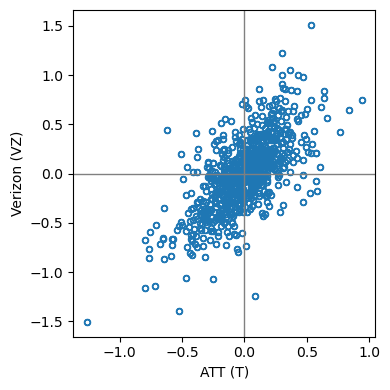

In [76]:
# Creamos un gráfico de dispersión utilizando la columna 'T' como eje x y la columna 'VZ' como eje y en el DataFrame 'telecom'.
# Configuramos el tamaño del gráfico y utilizamos un marcador personalizado ('$◯') para los puntos.
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')

# Configuramos la etiqueta del eje x como 'ATT (T)' para reflejar la empresa asociada a la columna 'T'.
ax.set_xlabel('ATT (T)')

# Configuramos la etiqueta del eje y como 'Verizon (VZ)' para reflejar la empresa asociada a la columna 'VZ'.
ax.set_ylabel('Verizon (VZ)')

# Agregamos líneas horizontales y verticales en 0 para proporcionar referencia visual.
ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)

# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()

# Mostramos el gráfico.
plt.show()

**Figura 1-7**. Gráfico de dispersión de la correlación entre rendimientos de ATT y Verizon

Line2D(_child2)


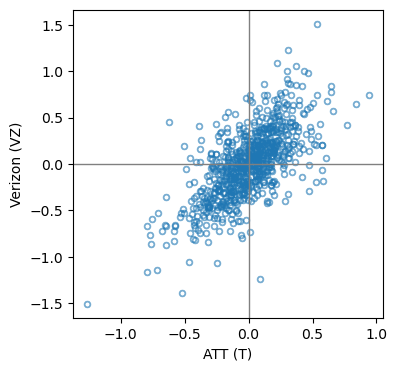

In [77]:
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color='grey', lw=1)
print(ax.axvline(0, color='grey', lw=1))

Los rendimientos tienen una relación positiva: mientras se agrupan alrededor de cero, en la mayoría de los días, las acciones suben o bajan en conjunto (cuadrantes superior derecho e inferior izquierdo). Hay menos días en los que una acción baja significativamente mientras que la otra acción sube, o viceversa (cuadrantes inferior derecho y superior izquierdo).
Si bien el gráfico de la Figura 1-7 muestra solo 754 puntos de datos, ya es evidente lo difícil que es identificar detalles en el centro del gráfico. Veremos más adelante cómo agregar transparencia a los puntos, o utilizar el agrupamiento hexagonal y los gráficos de densidad, puede ayudar a encontrar estructuras adicionales en los datos.

#### Ideas Clave:
* El coeficiente de correlación mide en qué medida dos variables emparejadas
(por ejemplo, altura y peso para individuos) están asociadas entre sí.
* Cuando los valores altos de v1 van de la mano con los valores altos de v2, v1 y v2 están positivamente asociados.
* Cuando los valores altos de v1 van de la mano con los valores bajos de v2, v1 y v2 están negativamente asociados.
* El coeficiente de correlación es una métrica estandarizada, por lo que siempre oscila entre -1 (correlación negativa perfecta) y +1 (correlación positiva perfecta).
* Un coeficiente de correlación de cero indica ninguna correlación, pero ten en cuenta que disposiciones aleatorias de datos producirán tanto valores positivos como negativos para el coeficiente de correlación solo por casualidad.

#### Lectura Adicional
"Statistics, 4th ed.", escrito por David Freedman, Robert Pisani y Roger Purves (W. W. Norton, 2007), ofrece una excelente discusión sobre correlación.

# Explorando Dos o Más Variables

Estimadores familiares como la media y la varianza analizan las variables una a la vez (análisis univariado). El análisis de correlación (ver "Correlación" en la página 30) es un método importante que compara dos variables (análisis bivariado). En esta sección, exploramos estimaciones y gráficos adicionales, así como más de dos variables (análisis multivariado).

### Términos Clave para Explorar Dos o Más Variables

##### Tabla de contingencia
Un recuento de ocurrencias entre dos o más variables categóricas.

##### Binning hexagonal
Un gráfico de dos variables numéricas con los registros agrupados en hexágonos.

##### Gráfico de contorno
Un gráfico que muestra la densidad de dos variables numéricas, similar a un mapa topográfico.

##### Gráfico de violín
Similar a un diagrama de caja, pero muestra la estimación de densidad.

Al igual que el análisis univariado, el análisis bivariado implica tanto el cálculo de estadísticas resumidas como la creación de representaciones visuales. El tipo adecuado de análisis bivariado o multivariado depende de la naturaleza de los datos: numéricos frente a categóricos.

# Hexagonal Binning y Contornos (Graficando Datos Numéricos Versus Numéricos)

Los scatterplots son adecuados cuando hay un número relativamente pequeño de valores de datos. El gráfico de rendimientos de acciones en la Figura 1-7 involucra solo alrededor de 750 puntos. Para conjuntos de datos con cientos de miles o millones de registros, un scatterplot sería demasiado denso, por lo que necesitamos una forma diferente de visualizar la relación. Para ilustrar, consideremos el conjunto de datos kc_tax, que contiene los valores de tasación fiscal de propiedades residenciales en el condado de King, Washington. Para enfocarnos en la parte principal de los datos, eliminamos las residencias muy caras y muy pequeñas o grandes utilizando la función de subconjunto (subset):

    kc_tax0 <- subset(kc_tax, TaxAssessedValue < 750000 &
                      SqFtTotLibinf > 100 &
                      SqFtTotLiving < 3500)
    nrow(kc_tax0)
    432693

En pandas, filtramos el conjunto de datos de la siguiente manera:

In [79]:
# Leemos los datos del archivo CSV 'KC_TAX_CSV' y almacenamos el resultado en el DataFrame 'kc_tax'.
kc_tax = pd.read_csv(KC_TAX_CSV)

# Filtramos el DataFrame 'kc_tax' para seleccionar filas que cumplan con ciertas condiciones:
# - 'TaxAssessedValue' debe ser menor que 750,000.
# - 'SqFtTotLiving' debe ser mayor que 100.
# - 'SqFtTotLiving' debe ser menor que 3,500.
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]

# Imprimimos la forma (número de filas y columnas) del DataFrame resultante 'kc_tax0'.
print(kc_tax0.shape)

(432693, 3)



1. **Leemos los datos del archivo CSV:**
   ```python
   # Leemos los datos del archivo CSV 'KC_TAX_CSV' y almacenamos el resultado en el DataFrame 'kc_tax'.
   kc_tax = pd.read_csv(KC_TAX_CSV)
   ```
   Aquí, se utiliza la función `pd.read_csv` de la biblioteca Pandas para leer los datos del archivo CSV especificado por la variable `KC_TAX_CSV` y almacenarlos en el DataFrame llamado 'kc_tax'.

2. **Filtramos el DataFrame para seleccionar filas que cumplan ciertas condiciones:**
   ```python
   # Filtramos el DataFrame 'kc_tax' para seleccionar filas que cumplan con ciertas condiciones:
   # - 'TaxAssessedValue' debe ser menor que 750,000.
   # - 'SqFtTotLiving' debe ser mayor que 100.
   # - 'SqFtTotLiving' debe ser menor que 3,500.
   kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                        (kc_tax.SqFtTotLiving > 100) &
                        (kc_tax.SqFtTotLiving < 3500), :]
   ```
   Aquí, se utiliza el método `loc` para filtrar el DataFrame 'kc_tax' según tres condiciones:
   - La columna 'TaxAssessedValue' debe tener un valor menor que 750,000.
   - La columna 'SqFtTotLiving' debe tener un valor mayor que 100.
   - La columna 'SqFtTotLiving' debe tener un valor menor que 3,500.
   El resultado se almacena en un nuevo DataFrame llamado 'kc_tax0'.

3. **Imprimimos la forma del DataFrame resultante:**
   ```python
   # Imprimimos la forma (número de filas y columnas) del DataFrame resultante 'kc_tax0'.
   print(kc_tax0.shape)
   ```
   Finalmente, se utiliza el método `shape` para obtener y imprimir el número de filas y columnas del DataFrame 'kc_tax0', lo cual proporciona información sobre la cantidad de datos que cumplen con las condiciones especificadas.

La Figura 1-8 es un gráfico de hexagonal binning que representa la relación entre los pies cuadrados terminados y el valor de tasación fiscal para viviendas en el condado de King. En lugar de graficar puntos, que aparecerían como una nube oscura monolítica, agrupamos los registros en hexágonos y representamos los hexágonos con un color que indica la cantidad de registros en ese bin. En este gráfico, la relación positiva entre los pies cuadrados y el valor de tasación fiscal es evidente. Una característica interesante es la sugerencia de bandas adicionales por encima de la banda principal (más oscura) en la parte inferior, lo que indica viviendas que tienen la misma cantidad de pies cuadrados que las de la banda principal pero un valor de tasación fiscal más alto.

La Figura 1-8 fue generada por el potente paquete R ggplot2, desarrollado por Hadley Wickham [ggplot2]. ggplot2 es uno de varios nuevos paquetes de software para el análisis visual exploratorio avanzado de datos; consulta "Visualización de Múltiples Variables" en la página 43.

    ggplot(kc_tax0, (aes(x=SqFtTotLiving, y=TaxAssessedValue))) +
     stat_binhex(color='white') +
     theme_bw() +
     scale_fill_gradient(low='white', high='black') +
     labs(x='Finished Square Feet', y='Tax-Assessed Value')

En Python, los gráficos de hexagonal binning están fácilmente disponibles utilizando el método hexbin del marco de datos de pandas:

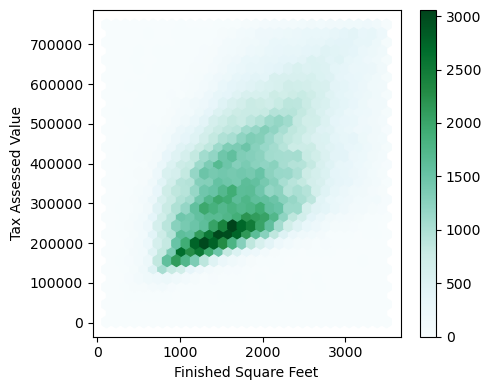

In [80]:
# Creamos un gráfico hexbin utilizando el DataFrame 'kc_tax0' con 'SqFtTotLiving' en el eje x y 'TaxAssessedValue' en el eje y.
# Configuramos el tamaño de la cuadrícula con 'gridsize=30', lo que afecta la cantidad de hexágonos en el gráfico.
# 'sharex=False' garantiza que los ejes x no se compartan entre subgráficos (si hay varios).
# 'figsize=(5, 4)' establece el tamaño del gráfico.
ax = kc_tax0.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue", gridsize=30, sharex=False, figsize=(5, 4))

# Configuramos la etiqueta del eje x como "Finished Square Feet" para reflejar la variable en el eje x.
ax.set_xlabel("Finished Square Feet")

# Configuramos la etiqueta del eje y como "Tax Assessed Value" para reflejar la variable en el eje y.
ax.set_ylabel("Tax Assessed Value")

# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()

# Mostramos el gráfico.
plt.show()

**Figura 1-8**. Hexagonal binning para el valor de tasación fiscal versus pies cuadrados terminados.


```python
# Creamos un gráfico hexbin utilizando el DataFrame 'kc_tax0' con 'SqFtTotLiving' en el eje x y 'TaxAssessedValue' en el eje y.
# Configuramos el tamaño de la cuadrícula con 'gridsize=30', lo que afecta la cantidad de hexágonos en el gráfico.
# 'sharex=False' garantiza que los ejes x no se compartan entre subgráficos (si hay varios).
# 'figsize=(5, 4)' establece el tamaño del gráfico.
ax = kc_tax0.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue", gridsize=30, sharex=False, figsize=(5, 4))
```

- En esta línea, estás utilizando el método `hexbin` de Pandas para crear un gráfico hexbin. Se especifica el DataFrame `kc_tax0` y se definen las columnas 'SqFtTotLiving' y 'TaxAssessedValue' como los ejes x e y, respectivamente. El parámetro `gridsize=30` controla la cantidad de hexágonos en el gráfico. `sharex=False` asegura que los ejes x no se compartan entre subgráficos, y `figsize=(5, 4)` establece el tamaño del gráfico.

```python
# Configuramos la etiqueta del eje x como "Finished Square Feet" para reflejar la variable en el eje x.
ax.set_xlabel("Finished Square Feet")
```

- Esta línea configura la etiqueta del eje x del gráfico hexbin como "Finished Square Feet", que refleja la variable representada en el eje x.

```python
# Configuramos la etiqueta del eje y como "Tax Assessed Value" para reflejar la variable en el eje y.
ax.set_ylabel("Tax Assessed Value")
```

- Aquí, se configura la etiqueta del eje y del gráfico hexbin como "Tax Assessed Value", reflejando la variable representada en el eje y.

```python
# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()
```

- Esta línea utiliza `tight_layout()` de Matplotlib para ajustar automáticamente el diseño del gráfico y evitar superposiciones.

```python
# Mostramos el gráfico.
plt.show()
```

- Finalmente, esta línea muestra el gráfico hexbin en la pantalla utilizando `plt.show()`.

La Figura 1-9 utiliza contornos superpuestos en un scatterplot para visualizar la relación entre dos variables numéricas. Los contornos son básicamente un mapa topográfico para dos variables; cada banda de contorno representa una densidad específica de puntos, aumentando a medida que uno se acerca a un "pico". Este gráfico muestra una historia similar a la Figura 1-8: hay un pico secundario al "norte" del pico principal. Este gráfico también fue creado utilizando ggplot2 con la función integrada geom_density2d:

    ggplot(kc_tax0, aes(SqFtTotLiving, TaxAssessedValue)) +
     theme_bw() +
     geom_point(alpha=0.1) +
     geom_density2d(color='white') +
     labs(x='Finished Square Feet', y='Tax-Assessed Value')

La función `kdeplot` de seaborn en Python crea un gráfico de contorno:

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

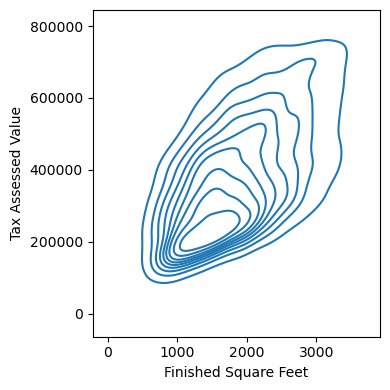

In [81]:
# Creamos una figura y ejes para el gráfico con un tamaño específico.
fig, ax = plt.subplots(figsize=(4, 4))

# Utilizamos Seaborn para crear un gráfico de densidad bidimensional (kdeplot) del DataFrame 'kc_tax0'.
# Muestreamos aleatoriamente 10,000 puntos para mejorar la visualización.
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)

# Configuramos la etiqueta del eje x como "Finished Square Feet" para reflejar la variable en el eje x.
ax.set_xlabel('Finished Square Feet')

# Configuramos la etiqueta del eje y como "Tax Assessed Value" para reflejar la variable en el eje y.
ax.set_ylabel('Tax Assessed Value')

# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()

# Mostramos el gráfico.
plt.show()

**Figura 1-9**. Gráfico de contorno para el valor de tasación fiscal versus pies cuadrados terminados.


```python
# Creamos una figura y ejes para el gráfico con un tamaño específico.
fig, ax = plt.subplots(figsize=(4, 4))
```
- En esta línea, se utiliza `plt.subplots` para crear una figura (`fig`) y ejes (`ax`) para el gráfico. El parámetro `figsize=(4, 4)` establece el tamaño de la figura en pulgadas (4 pulgadas de ancho y 4 pulgadas de alto).

```python
# Utilizamos Seaborn para crear un gráfico de densidad bidimensional (kdeplot) del DataFrame 'kc_tax0'.
# Muestreamos aleatoriamente 10,000 puntos para mejorar la visualización.
sns.kdeplot(data=kc_tax0.sample(10000), x='SqFtTotLiving', y='TaxAssessedValue', ax=ax)
```
- Aquí, `sns.kdeplot` de Seaborn se utiliza para crear un gráfico de densidad bidimensional. `data=kc_tax0.sample(10000)` indica que estamos tomando una muestra aleatoria de 10,000 puntos del DataFrame 'kc_tax0' para mejorar la visualización. Se especifica que 'SqFtTotLiving' está en el eje x y 'TaxAssessedValue' en el eje y. El resultado se plota en los ejes previamente creados (`ax`).

```python
# Configuramos la etiqueta del eje x como "Finished Square Feet" para reflejar la variable en el eje x.
ax.set_xlabel('Finished Square Feet')
```
- Aquí, se establece la etiqueta del eje x como "Finished Square Feet" para reflejar la variable representada en el eje x.

```python
# Configuramos la etiqueta del eje y como "Tax Assessed Value" para reflejar la variable en el eje y.
ax.set_ylabel('Tax Assessed Value')
```
- Similarmente, se establece la etiqueta del eje y como "Tax Assessed Value" para reflejar la variable representada en el eje y.

```python
# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()
```
- Se utiliza `plt.tight_layout()` para ajustar automáticamente el diseño del gráfico y evitar superposiciones.

```python
# Mostramos el gráfico.
plt.show()
```
- Finalmente, `plt.show()` se utiliza para mostrar el gráfico en la pantalla.

Se utilizan otros tipos de gráficos para mostrar la relación entre dos variables numéricas, incluidos los mapas de calor. Los mapas de calor, el hexagonal binning y los gráficos de contorno ofrecen una representación visual de una densidad bidimensional. De esta manera, son análogos naturales a los histogramas y gráficos de densidad.

# Dos Variables Categóricas
Una forma útil de resumir dos variables categóricas es mediante una tabla de contingencia, que es una tabla de recuentos por categoría. La Tabla 1-8 muestra la tabla de contingencia entre la calificación de un préstamo personal y el resultado de ese préstamo. Esto se toma de datos proporcionados por Lending Club, líder en el negocio de préstamos entre particulares. La calificación va desde A (alta) hasta G (baja). El resultado puede ser completamente pagado, actual, atrasado o cancelado (se espera que no se recupere el saldo del préstamo). Esta tabla muestra el recuento y los porcentajes por fila. Los préstamos de alta calificación tienen un porcentaje muy bajo de atrasos/incobrabilidad en comparación con los préstamos de calificación más baja.

In [82]:
# Leemos los datos del archivo CSV 'LC_LOANS_CSV' y almacenamos el resultado en el DataFrame 'lc_loans'.

lc_loans = pd.read_csv(LC_LOANS_CSV)

In [83]:
crosstab = lc_loans.pivot_table(index="grade", columns="status", aggfunc=lambda x: len(x), margins=True)

print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [84]:
# Creamos una copia de la tabla de contingencia y seleccionamos las filas correspondientes a las calificaciones 'A' a 'G'.
df = crosstab.copy().loc['A':'G', :]

# Normalizamos las frecuencias en las columnas 'Charged Off' a 'Late', dividiendo cada valor por la suma total en la columna 'All'.
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)

# Normalizamos la columna 'All' dividiendo cada valor por la suma total de la columna 'All'.
df['All'] = df['All'] / sum(df['All'])

# Almacenamos el resultado en el DataFrame perc_crosstab para representar la tabla de contingencia como porcentajes.
perc_crosstab = df

# Imprimimos la tabla de contingencia normalizada.
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


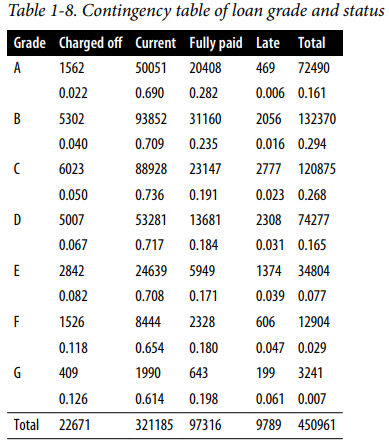

**Tabla 1-8**. Tabla de contingencia de la calificación del préstamo y su estado.

Las tablas de contingencia pueden mostrar solo recuentos, o también pueden incluir porcentajes por columna y totales. Las tablas dinámicas en Excel son quizás la herramienta más común utilizada para crear tablas de contingencia. En R, la función `CrossTable` en el paquete `descr` produce tablas de contingencia, y el siguiente código se utilizó para crear la Tabla 1-8:

    library(descr)
    x_tab <- CrossTable(lc_loans$grade, lc_loans$status,
     prop.c=FALSE, prop.chisq=FALSE, prop.t=FALSE)


El método `pivot_table` crea la tabla dinámica en Python. El argumento `aggfunc` nos permite obtener los recuentos. Calcular los porcentajes es un poco más complejo:

In [85]:
# Creamos una tabla de contingencia utilizando la función pivot_table con las calificaciones 'A' a 'G' y los estados de préstamo.
crosstab = lc_loans.pivot_table(index='grade', columns='status', aggfunc=lambda x: len(x), margins=True)

# Seleccionamos las filas correspondientes a las calificaciones 'A' a 'G' y creamos una copia del DataFrame.
df = crosstab.loc['A':'G', :].copy()

# Normalizamos las frecuencias en las columnas 'Charged Off' a 'Late', dividiendo cada valor por la suma total en la columna 'All'.
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)

# Normalizamos la columna 'All' dividiendo cada valor por la suma total de la columna 'All'.
df['All'] = df['All'] / sum(df['All'])

# Almacenamos el resultado en el DataFrame perc_crosstab para representar la tabla de contingencia como porcentajes.
perc_crosstab = df

In [86]:
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


* El argumento `margins` agregará las sumas de columnas y filas.
* Creamos una copia de la tabla dinámica, ignorando las sumas de columnas.
* Dividimos las filas con la suma de la fila. 
* Dividimos la columna 'All' por su suma.

# Datos Categóricos y Numéricos
Los boxplots (ver "Percentiles and Boxplots" en la página 20) son una forma sencilla de comparar visualmente las distribuciones de una variable numérica agrupada según una variable categórica. Por ejemplo, podríamos querer comparar cómo varía el porcentaje de retrasos en vuelos entre aerolíneas. La Figura 1-10 muestra el porcentaje de vuelos en un mes que se retrasaron, donde el retraso estaba bajo el control de la aerolínea:

    boxplot(pct_carrier_delay ~ airline, data=airline_stats, ylim=c(0, 50))


El método `boxplot` de pandas toma el argumento `by` que divide el conjunto de datos en grupos y crea los boxplots individuales:

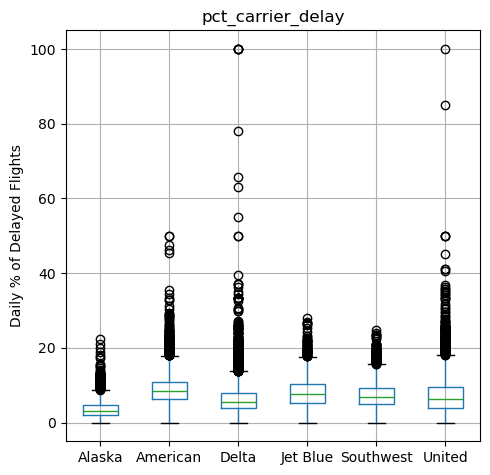

In [87]:
# Leemos los datos del archivo CSV 'AIRLINE_STATS_CSV' y almacenamos el resultado en el DataFrame 'airline_stats'.
airline_stats = pd.read_csv(AIRLINE_STATS_CSV)

# Mostramos las primeras filas del DataFrame para tener una vista previa de los datos.
airline_stats.head()

# Creamos un gráfico de caja (boxplot) que muestra la distribución de los porcentajes de retraso por aerolínea.
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(5, 5))

# Configuramos las etiquetas del eje x e y y eliminamos el título predeterminado generado por el boxplot.
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()

# Mostramos el gráfico de caja.
plt.show()

**Figura 1-10**. Gráfico de caja del porcentaje de retrasos de aerolíneas por transportista.

Alaska destaca por tener los menores retrasos, mientras que American tiene los mayores retrasos: el primer cuartil para American es más alto que el tercer cuartil para Alaska. Un gráfico de violín, introducido por [Hintze-Nelson-1998], es una mejora al boxplot y representa la estimación de densidad con la densidad en el eje y. La densidad se refleja y voltea, y la forma resultante se rellena, creando una imagen que se asemeja a un violín. La ventaja de un gráfico de violín es que puede mostrar matices en la distribución que no son perceptibles en un boxplot. Por otro lado, el boxplot muestra de manera más clara los valores atípicos en los datos. En ggplot2, la función `geom_violin` se puede utilizar para crear un gráfico de violín de la siguiente manera:

    ggplot(data=airline_stats, aes(airline, pct_carrier_delay)) +
     ylim(0, 50) +
     geom_violin() +
     labs(x='', y='Daily % of Delayed Flights')

Los gráficos de violín están disponibles con el método `violinplot` del paquete seaborn:

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


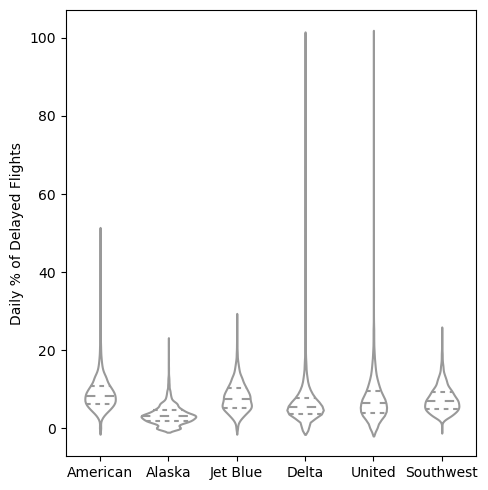

In [88]:
# Creamos una figura y ejes para el gráfico de violín con un tamaño específico.
fig, ax = plt.subplots(figsize=(5, 5))

# Utilizamos Seaborn para crear un gráfico de violín que muestra la distribución de los porcentajes de retraso por aerolínea.
# Se establece 'inner' en 'quartile' para representar el rango intercuartílico dentro del violín.
# El color de fondo se establece en blanco para mayor claridad.
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')

# Configuramos las etiquetas del eje x e y del gráfico de violín.
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()

# Mostramos el gráfico de violín.
plt.show()

**Figura 1-11**. Gráfico de violín del porcentaje de retrasos de aerolíneas por transportista.

El gráfico correspondiente se muestra en la Figura 1-11. El gráfico de violín muestra una concentración en la distribución cerca de cero para Alaska y, en menor medida, para Delta. Este fenómeno no es tan evidente en el boxplot. Puedes combinar un gráfico de violín con un boxplot agregando `geom_boxplot` al gráfico (aunque esto funciona mejor cuando se usan colores).

# Visualización de Múltiples Variables
Los tipos de gráficos utilizados para comparar dos variables, como scatterplots, hexagonal binning y boxplots, se pueden extender fácilmente a más variables a través del concepto de condicionamiento. Como ejemplo, volvamos a la Figura 1-8, que mostraba la relación entre los pies cuadrados terminados de las viviendas y sus valores de tasación fiscal. Observamos que parece haber un grupo de viviendas que tienen un valor de tasación fiscal más alto por pie cuadrado. Profundizando más, la Figura 1-12 tiene en cuenta el efecto de la ubicación al representar los datos para un conjunto de códigos postales. Ahora la imagen es mucho más clara: el valor de tasación fiscal es mucho más alto en algunos códigos postales (98105, 98126) que en otros (98108, 98188). Esta disparidad da lugar a los grupos observados en la Figura 1-8. Creamos la Figura 1-12 utilizando ggplot2 y la idea de facetas, o una variable de condicionamiento (en este caso, el código postal):

    ggplot(subset(kc_tax0, ZipCode %in% c(98188, 98105, 98108, 98126)),
     aes(x=SqFtTotLiving, y=TaxAssessedValue)) +
     stat_binhex(color='white') +
     theme_bw() +
     scale_fill_gradient(low='white', high='blue') +
     labs(x='Finished Square Feet', y='Tax-Assessed Value') +
     facet_wrap('ZipCode')


Utiliza las funciones `facet_wrap` y `facet_grid` de ggplot para especificar la variable de condicionamiento.

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


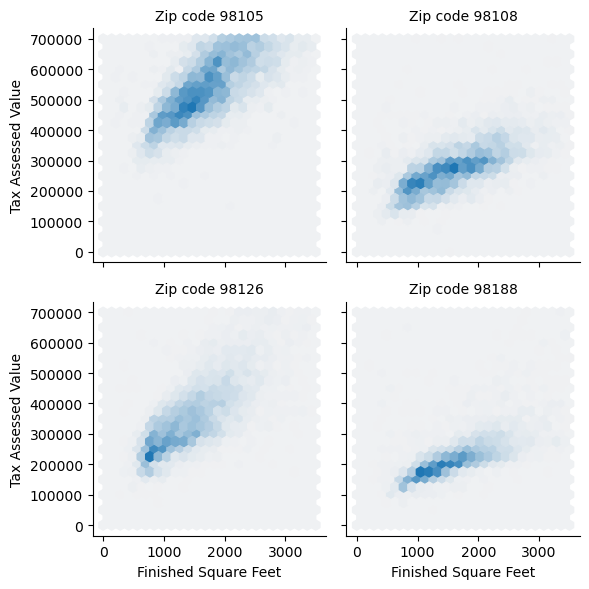

In [89]:
# Creamos una lista de códigos postales a filtrar.
zip_codes = [98188, 98105, 98108, 98126]

# Filtramos el DataFrame 'kc_tax0' para incluir solo las filas con códigos postales presentes en la lista 'zip_codes'.
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]

# Mostramos el DataFrame resultante que contiene solo las filas con los códigos postales especificados.
kc_tax_zip

# Definimos una función hexbin para crear un gráfico de hexágonos.
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

# Creamos un objeto FacetGrid de Seaborn con múltiples subgráficos para cada código postal.
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

# Mapeamos la función hexbin en los datos y especificamos las variables 'SqFtTotLiving' y 'TaxAssessedValue'.
# También establecemos el rango del gráfico mediante el parámetro 'extent'.
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])

# Configuramos las etiquetas de los ejes x e y y los títulos de cada subgráfico.
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')
g.set_titles('Zip code {col_name:.0f}')

# Ajustamos automáticamente el diseño del gráfico para evitar superposiciones.
plt.tight_layout()

# Mostramos el gráfico de hexágonos.
plt.show()

**Figura 1-12**. Valor de tasación fiscal versus pies cuadrados terminados por código postal

La mayoría de los paquetes de Python basan sus visualizaciones en Matplotlib. Aunque en principio es posible crear gráficos facetados usando Matplotlib, el código puede volverse complicado. Afortunadamente, seaborn tiene una manera relativamente sencilla de crear estos gráficos:

Utiliza los argumentos `col` y `row` para especificar las variables de condicionamiento. Para una única variable de condicionamiento, utiliza `col` junto con `col_wrap` para envolver los gráficos facetados en múltiples filas.

El método `map` llama a la función `hexbin` con subconjuntos del conjunto de datos original para los diferentes códigos postales. `extent` define los límites de los ejes x e y.

El concepto de variables de condicionamiento en un sistema gráfico fue pionero en Trellis graphics, desarrollado por Rick Becker, Bill Cleveland y otros en Bell Labs [TrellisGraphics]. Esta idea se ha propagado a varios sistemas gráficos modernos, como los paquetes lattice [lattice] y ggplot2 en R, y los módulos seaborn [seaborn] y Bokeh [bokeh] en Python. Las variables de condicionamiento también son fundamentales para plataformas de inteligencia empresarial como Tableau y Spotfire. Con el advenimiento de una gran potencia informática, las plataformas de visualización modernas han avanzado mucho más allá de los humildes comienzos del análisis exploratorio de datos. Sin embargo, los conceptos y herramientas clave desarrollados hace medio siglo (por ejemplo, los simples boxplots) aún forman la base de estos sistemas.

#### Ideas Clave
* El hexagonal binning y los gráficos de contorno son herramientas útiles que permiten examinar gráficamente dos variables numéricas a la vez, sin verse abrumados por grandes cantidades de datos.
* Las tablas de contingencia son la herramienta estándar para examinar los recuentos de dos variables categóricas.
* Los boxplots y los gráficos de violín te permiten representar gráficamente una variable numérica en función de una variable categórica.

#### Lecturas Adicionales
* "Modern Data Science with R" de Benjamin Baumer, Daniel Kaplan y Nicholas Horton (Chapman & Hall/CRC Press, 2017) tiene una excelente presentación de "una gramática para gráficos" (la "gg" en ggplot).
* "ggplot2: Elegant Graphics for Data Analysis" de Hadley Wickham (Springer, 2009) es un recurso excelente del creador de ggplot2.
* Josef Fruehwald tiene un tutorial en línea sobre ggplot2.

# Resumen
El análisis exploratorio de datos (EDA), iniciado por John Tukey, estableció los cimientos para el campo de la ciencia de datos. La idea clave de EDA es que el primer y más importante paso en cualquier proyecto basado en datos es observar los datos. Al resumir y visualizar los datos, puedes obtener una intuición valiosa y comprensión del proyecto.

Este capítulo ha revisado conceptos que van desde métricas simples, como estimaciones de ubicación y variabilidad, hasta visualizaciones ricas que exploran las relaciones entre múltiples variables, como en la Figura 1-12. El conjunto diverso de herramientas y técnicas desarrolladas por la comunidad de código abierto, combinado con la expresividad de los lenguajes R y Python, ha creado una multitud de formas de explorar y analizar datos.

El análisis exploratorio debería ser una piedra angular en cualquier proyecto de ciencia de datos.